## Data Injection

In [193]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import kagglehub as kg
from pathlib import Path
from scipy.stats import ttest_ind

In [194]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [195]:
path = kg.dataset_download("abrambeyer/openintro-possum")
possum = Path('possum.csv')
path_full = path / possum

print("Path to dataset files:", path)

df = pd.read_csv(path_full)
df.head(50)

Path to dataset files: C:\Users\user49\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


## Data Info

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [197]:
# Checking for missing values
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [198]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [199]:
# Summary statistics
df.describe(include = 'all')

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104,104,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,NaN,NaN,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,NaN,NaN,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,NaN,NaN,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000


In [200]:
df.columns

df.index

RangeIndex(start=0, stop=104, step=1)

## Data Cleaning

In [201]:
# Drop missing values
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [202]:
# Check for inconsistent categorical values
for col in ['site', 'Pop', 'sex']:
    print(f"{col}: {df[col].unique()}")

site: [1 2 3 4 5 6 7]
Pop: ['Vic' 'other']
sex: ['m' 'f']


In [203]:
# Set case index as index.
df = df.set_index('case')
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0


In [204]:
# Store a copy of my data
df_copy = df.copy()

## General Statistical Analysis based on Numerical Columns

In [205]:
# Select numerical and categorical columns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [206]:
# Measure of centre for numerical columns
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    midrange = (df[col].min() + df[col].max()) / 2
    print(f"\n{col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Mode: {mode:.2f}")
    print(f"  Midrange: {midrange:.2f}")


site:
  Mean: 3.67
  Median: 4.00
  Mode: 1.00
  Midrange: 4.00

age:
  Mean: 3.82
  Median: 3.00
  Mode: 3.00
  Midrange: 5.00

hdlngth:
  Mean: 92.73
  Median: 92.90
  Mode: 93.30
  Midrange: 92.80

skullw:
  Mean: 56.96
  Median: 56.40
  Mode: 57.60
  Midrange: 59.30

totlngth:
  Mean: 87.27
  Median: 88.00
  Mode: 89.00
  Midrange: 85.75

taill:
  Mean: 37.05
  Median: 37.00
  Mode: 38.00
  Midrange: 37.50

footlgth:
  Mean: 68.40
  Median: 67.90
  Mode: 73.20
  Midrange: 69.10

earconch:
  Mean: 48.13
  Median: 46.80
  Mode: 44.90
  Midrange: 48.75

eye:
  Mean: 15.05
  Median: 14.90
  Mode: 14.50
  Midrange: 15.30

chest:
  Mean: 27.06
  Median: 27.00
  Mode: 28.00
  Midrange: 27.00

belly:
  Mean: 32.64
  Median: 32.50
  Mode: 32.00
  Midrange: 32.50


In [207]:
# Measure of spread for numerical columns
from matplotlib.pylab import minimum


for col in numerical_cols:
    std_dev = df[col].std()
    variance = df[col].var()
    min_val = df[col].min()
    max_val = df[col].max()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    data_range = df[col].max() - df[col].min()
    iqr = stats.iqr(df[col])
    kurtosis = df[col].kurtosis()
    skewness = df[col].skew()
    print(f"\n{col}:")
    print(f"  Standard Deviation: {std_dev:.2f}")
    print(f"  Variance: {variance:.2f}")
    print(f"  Minimum: {min_val:.2f}")
    print(f"  Maximum: {max_val:.2f}")
    print(f"  Q1 (25th percentile): {q1:.2f}")
    print(f"  Q3 (75th percentile): {q3:.2f}")
    print(f"  Range: {data_range:.2f}")
    print(f"  Interquartile Range (IQR): {iqr:.2f}")
    print(f"  Kurtosis: {kurtosis:.2f}")
    print(f"  Skewness: {skewness:.2f}")


site:
  Standard Deviation: 2.37
  Variance: 5.60
  Minimum: 1.00
  Maximum: 7.00
  Q1 (25th percentile): 1.00
  Q3 (75th percentile): 6.00
  Range: 6.00
  Interquartile Range (IQR): 5.00
  Kurtosis: -1.61
  Skewness: 0.14

age:
  Standard Deviation: 1.92
  Variance: 3.67
  Minimum: 1.00
  Maximum: 9.00
  Q1 (25th percentile): 2.00
  Q3 (75th percentile): 5.00
  Range: 8.00
  Interquartile Range (IQR): 3.00
  Kurtosis: -0.27
  Skewness: 0.56

hdlngth:
  Standard Deviation: 3.52
  Variance: 12.38
  Minimum: 82.50
  Maximum: 103.10
  Q1 (25th percentile): 90.70
  Q3 (75th percentile): 94.80
  Range: 20.60
  Interquartile Range (IQR): 4.10
  Kurtosis: 1.03
  Skewness: -0.05

skullw:
  Standard Deviation: 3.10
  Variance: 9.63
  Minimum: 50.00
  Maximum: 68.60
  Q1 (25th percentile): 55.00
  Q3 (75th percentile): 58.10
  Range: 18.60
  Interquartile Range (IQR): 3.10
  Kurtosis: 2.52
  Skewness: 1.03

totlngth:
  Standard Deviation: 4.20
  Variance: 17.61
  Minimum: 75.00
  Maximum: 96.50

In [208]:
# Outlier Detection
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"\n{col}:")
    print(f"  IQR Outliers: {len(outliers_iqr)} values outside [{lower_bound:.2f}, {upper_bound:.2f}]")


site:
  IQR Outliers: 0 values outside [-6.50, 13.50]

age:
  IQR Outliers: 0 values outside [-2.50, 9.50]

hdlngth:
  IQR Outliers: 3 values outside [84.55, 100.95]

skullw:
  IQR Outliers: 8 values outside [50.35, 62.75]

totlngth:
  IQR Outliers: 1 values outside [76.25, 98.25]

taill:
  IQR Outliers: 4 values outside [33.00, 41.00]

footlgth:
  IQR Outliers: 0 values outside [52.50, 84.50]

earconch:
  IQR Outliers: 0 values outside [34.00, 62.80]

eye:
  IQR Outliers: 1 values outside [12.45, 17.65]

chest:
  IQR Outliers: 1 values outside [21.75, 31.75]

belly:
  IQR Outliers: 3 values outside [26.50, 38.50]


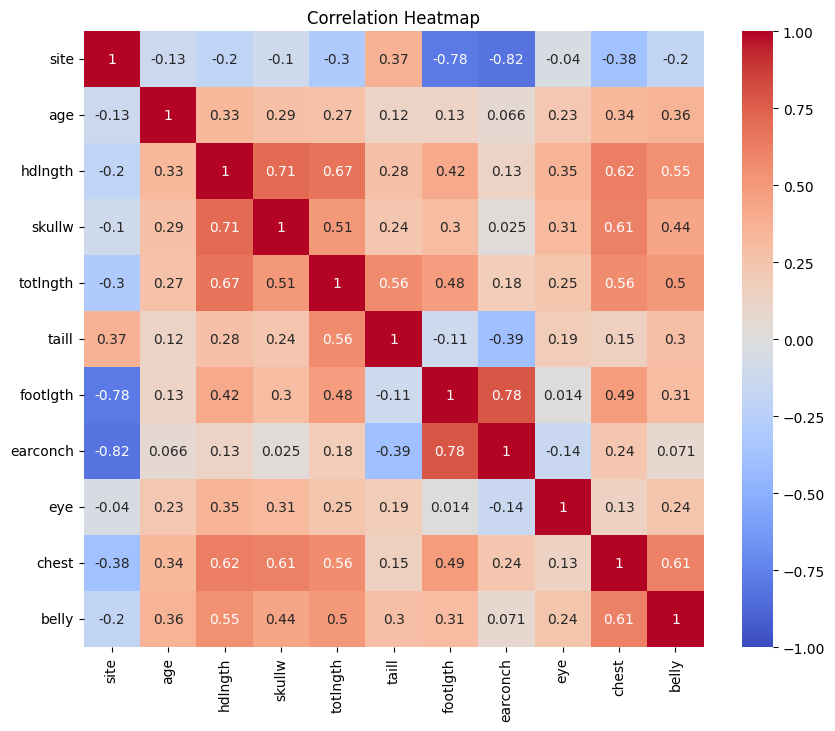

In [209]:
# --- Correlation Analysis ---
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Grouped Statistical Analysis based on Numerical Columns


In [210]:
# Group by Population
pop_group = df.groupby('Pop')
pop_summary = pop_group[numerical_cols].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
pop_summary.round(2)

site                              age                               \
       mean median   std   var min max  mean median   std   var  min  max   
Pop                                                                         
Vic    1.23    1.0  0.43  0.18   1   2  4.00    3.0  2.13  4.52  1.0  9.0   
other  5.48    6.0  1.37  1.87   3   7  3.69    3.0  1.75  3.06  1.0  7.0   

      hdlngth                                  skullw                     \
         mean median   std    var   min    max   mean median  std    var   
Pop                                                                        
Vic     92.90   93.3  2.48   6.13  84.7   96.3  56.82   56.3  2.5   6.25   
other   92.61   92.4  4.14  17.17  82.5  103.1  57.07   56.4  3.5  12.26   

                  totlngth                                  taill         \
        min   max     mean median   std    var   min   max   mean median   
Pop                                                                        
Vic    51.5  67.7    87.92   89.0  4.59  21.06  75.0  96.5  35.95   36.0   
other  50.0  68.6    86.79   86.5  3.85  14.83  80.5  96.0  37.86   38.0   

                              footlgth                                 \
        std   var   min   max     mean median   std   var   min   max   
Pop                                                                     
Vic    1.77  3.13  32.0  39.5    72.44   72.8  2.62  6.88  62.7  77.9   
other  1.71  2.94  34.0  43.0    65.40   65.2  2.77  7.67  60.3  73.2   

      earconch                                   eye                           \
          mean median   std   var   min   max   mean median   std   var   min   
Pop                                                                             
Vic      52.48   52.2  1.50  2.24  49.4  56.2  14.87   14.9  0.79  0.62  13.0   
other    44.91   44.9  1.58  2.49  41.3  48.0  15.18   15.0  1.21  1.47  12.8   

             chest                                 belly                     \
        max   mean median   std   var   min   max   mean median   std   var   
Pop                                                                           
Vic    16.4  27.63   28.0  1.80  3.23  23.0  31.0  32.79   33.0  2.70  7.28   
other  17.8  26.65   26.0  2.09  4.37  22.0  32.0  32.53   32.5  2.77  7.66   

                   
        min   max  
Pop                
Vic    25.0  40.0  
other  27.0  39.0

In [211]:
# Group by sex
sex_group = df.groupby('sex')
sex_summary = sex_group[numerical_cols].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
sex_summary.round(2)

site                              age                               \
     mean median   std   var min max  mean median   std   var  min  max   
sex                                                                       
f    3.00    2.0  2.24  5.02   1   7  3.95    3.5  1.96  3.85  1.0  9.0   
m    4.15    5.0  2.35  5.55   1   7  3.73    3.0  1.89  3.58  1.0  8.0   

    hdlngth                                  skullw                            \
       mean median   std    var   min    max   mean median   std    var   min   
sex                                                                             
f     92.24   92.5  2.54   6.44  84.7   96.9  56.58  56.35  2.60   6.76  51.5   
m     93.08   93.3  4.06  16.49  82.5  103.1  57.23  56.60  3.41  11.64  50.0   

          totlngth                                  taill                     \
      max     mean median   std    var   min   max   mean median   std   var   
sex                                                                            
f    67.7    88.02  88.75  4.16  17.32  75.0  96.5  37.12  37.75  1.85  3.42   
m    68.6    86.73  86.00  4.17  17.42  77.0  96.0  37.00  36.50  2.07  4.28   

                footlgth                                 earconch         \
      min   max     mean median   std    var   min   max     mean median   
sex                                                                        
f    32.0  41.0    69.11  70.45  4.91  24.12  60.3  77.9    48.77   50.8   
m    32.0  43.0    67.89  66.50  3.99  15.90  62.0  75.0    47.68   46.2   

                                eye                                 chest  \
      std    var   min   max   mean median   std   var   min   max   mean   
sex                                                                         
f    4.12  17.01  41.3  53.9  14.79  14.75  1.03  1.06  13.0  17.4  27.35   
m    3.99  15.90  41.7  56.2  15.24  15.00  1.05  1.10  12.8  17.8  26.86   

                                    belly                                 
    median   std   var   min   max   mean median   std   var   min   max  
sex                                                                       
f     28.0  1.86  3.47  23.0  31.0  32.94   33.0  2.94  8.65  25.0  40.0  
m     27.0  2.12  4.49  22.0  32.0  32.42   32.0  2.57  6.60  27.0  38.0

In [212]:
# T-tests between groups
print("\nT-test Results for Differences by Population and Sex:")
for col in numerical_cols:
    # T-test by Population
    vic_data = df[df['Pop'] == 'Vic'][col]
    other_data = df[df['Pop'] == 'other'][col]
    t_stat_pop, p_val_pop = ttest_ind(vic_data, other_data, nan_policy='omit')
    print(f"{col} (Pop): t-statistic = {t_stat_pop:.2f}, p-value = {p_val_pop:.4f}")
    
    # T-test by Sex
    male_data = df[df['sex'] == 'm'][col]
    female_data = df[df['sex'] == 'f'][col]
    t_stat_sex, p_val_sex = ttest_ind(male_data, female_data, nan_policy='omit')
    print(f"{col} (Sex): t-statistic = {t_stat_sex:.2f}, p-value = {p_val_sex:.4f}")


T-test Results for Differences by Population and Sex:
site (Pop): t-statistic = -19.67, p-value = 0.0000
site (Sex): t-statistic = 2.47, p-value = 0.0151
age (Pop): t-statistic = 0.80, p-value = 0.4234
age (Sex): t-statistic = -0.58, p-value = 0.5657
hdlngth (Pop): t-statistic = 0.41, p-value = 0.6835
hdlngth (Sex): t-statistic = 1.19, p-value = 0.2371
skullw (Pop): t-statistic = -0.39, p-value = 0.6946
skullw (Sex): t-statistic = 1.04, p-value = 0.2990
totlngth (Pop): t-statistic = 1.34, p-value = 0.1820
totlngth (Sex): t-statistic = -1.53, p-value = 0.1280
taill (Pop): t-statistic = -5.46, p-value = 0.0000
taill (Sex): t-statistic = -0.30, p-value = 0.7666
footlgth (Pop): t-statistic = 12.90, p-value = 0.0000
footlgth (Sex): t-statistic = -1.38, p-value = 0.1714
earconch (Pop): t-statistic = 24.33, p-value = 0.0000
earconch (Sex): t-statistic = -1.34, p-value = 0.1826
eye (Pop): t-statistic = -1.49, p-value = 0.1404
eye (Sex): t-statistic = 2.16, p-value = 0.0332
chest (Pop): t-stat

## Statistical Analysis based on Category

In [213]:
# Group based statistical analysis based on key numerical columns
for cat_col in categorical_cols:
    print(f"\nGroup Statistics by {cat_col}:")
    for num_col in ['totlngth', 'hdlngth', 'chest']:
        group_stats = df.groupby(cat_col)[num_col].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(2)
        print(f"\n{num_col} by {cat_col}:\n", group_stats)


Group Statistics by Pop:

totlngth by Pop:
         mean  median   std   min   max  count
Pop                                          
Vic    87.92    89.0  4.59  75.0  96.5     43
other  86.79    86.5  3.85  80.5  96.0     58

hdlngth by Pop:
         mean  median   std   min    max  count
Pop                                           
Vic    92.90    93.3  2.48  84.7   96.3     43
other  92.61    92.4  4.14  82.5  103.1     58

chest by Pop:
         mean  median   std   min   max  count
Pop                                          
Vic    27.63    28.0  1.80  23.0  31.0     43
other  26.65    26.0  2.09  22.0  32.0     58

Group Statistics by sex:

totlngth by sex:
       mean  median   std   min   max  count
sex                                        
f    88.02   88.75  4.16  75.0  96.5     42
m    86.73   86.00  4.17  77.0  96.0     59

hdlngth by sex:
       mean  median   std   min    max  count
sex                                         
f    92.24    92.5  2.54  84.7   96.

In [214]:
# T-tests for Binary Categorical Variables (sex, Pop)
print("\n2. T-tests for Binary Categorical Variables:")
for cat_col in ['sex', 'Pop']:
    print(f"\nT-tests for {cat_col}:")
    for num_col in ['totlngth', 'hdlngth', 'chest']:
        group1 = df[df[cat_col] == df[cat_col].unique()[0]][num_col]
        group2 = df[df[cat_col] == df[cat_col].unique()[1]][num_col]
        t_stat, p_val = stats.ttest_ind(group1, group2)
 
        mean_diff = group1.mean() - group2.mean()
        pooled_std = np.sqrt(((len(group1) - 1) * group1.std()**2 + (len(group2) - 1) * group2.std()**2) / (len(group1) + len(group2) - 2))
        cohen_d = mean_diff / pooled_std if pooled_std != 0 else 0
 
        print(f"{num_col} by {cat_col}: t={t_stat:.2f}, p={p_val:.4f}, Cohen's d={cohen_d:.2f}")


2. T-tests for Binary Categorical Variables:

T-tests for sex:
totlngth by sex: t=-1.53, p=0.1280, Cohen's d=-0.31
hdlngth by sex: t=1.19, p=0.2371, Cohen's d=0.24
chest by sex: t=-1.18, p=0.2405, Cohen's d=-0.24

T-tests for Pop:
totlngth by Pop: t=1.34, p=0.1820, Cohen's d=0.27
hdlngth by Pop: t=0.41, p=0.6835, Cohen's d=0.08
chest by Pop: t=2.47, p=0.0151, Cohen's d=0.50


In [215]:
# ANOVA for Multi-level Categorical Variable (site)
print("\n3. ANOVA for Site:")
for num_col in ['totlngth', 'hdlngth', 'chest']:
    groups = [df[df['site'] == s][num_col] for s in df['site'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
 
    ss_total = np.var(df[num_col], ddof=1) * (len(df[num_col]) - 1)
    ss_between = sum(len(g) * (g.mean() - df[num_col].mean())**2 for g in groups)
    eta_squared = ss_between / ss_total if ss_total != 0 else 0
 
    print(f"{num_col} by site: F={f_stat:.2f}, p={p_val:.4f}, Eta-squared={eta_squared:.2f}")


3. ANOVA for Site:
totlngth by site: F=12.90, p=0.0000, Eta-squared=0.45
hdlngth by site: F=8.97, p=0.0000, Eta-squared=0.36
chest by site: F=7.50, p=0.0000, Eta-squared=0.32


In [216]:
# Chi-square Test for Categorical Relationships
print("\n4. Chi-square Test for Categorical Relationships:")
for cat_col1 in ['sex', 'Pop']:
    for cat_col2 in ['Pop', 'site']:
        if cat_col1 < cat_col2:  # Avoid duplicate pairs
            contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
            chi2, p_val, dof, _ = stats.chi2_contingency(contingency_table)
            print(f"\n{cat_col1} vs {cat_col2}: Chi2={chi2:.2f}, p={p_val:.4f}, dof={dof}")


4. Chi-square Test for Categorical Relationships:

sex vs site: Chi2=7.49, p=0.2777, dof=6

Pop vs site: Chi2=101.00, p=0.0000, dof=6


## Visualizations

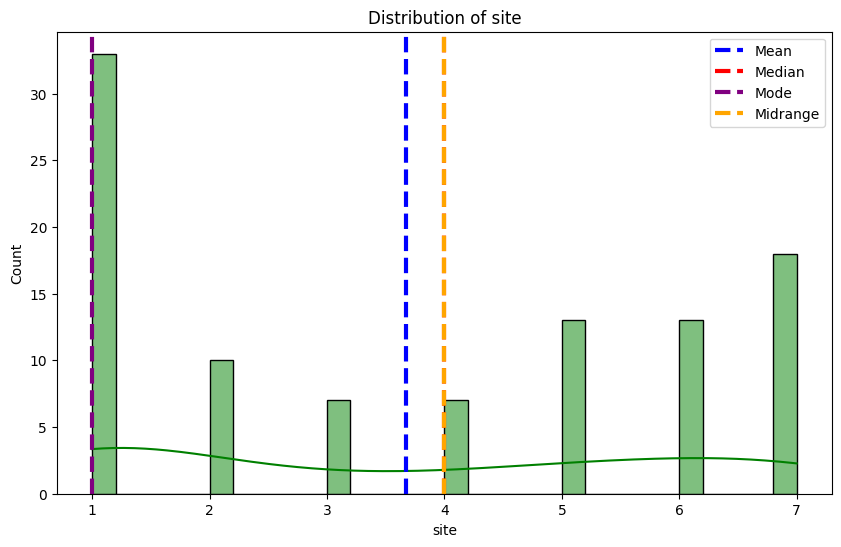

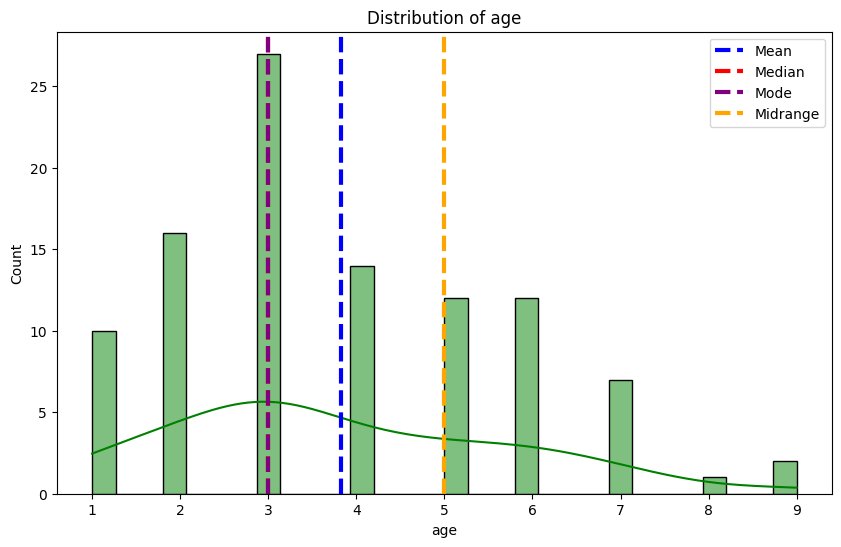

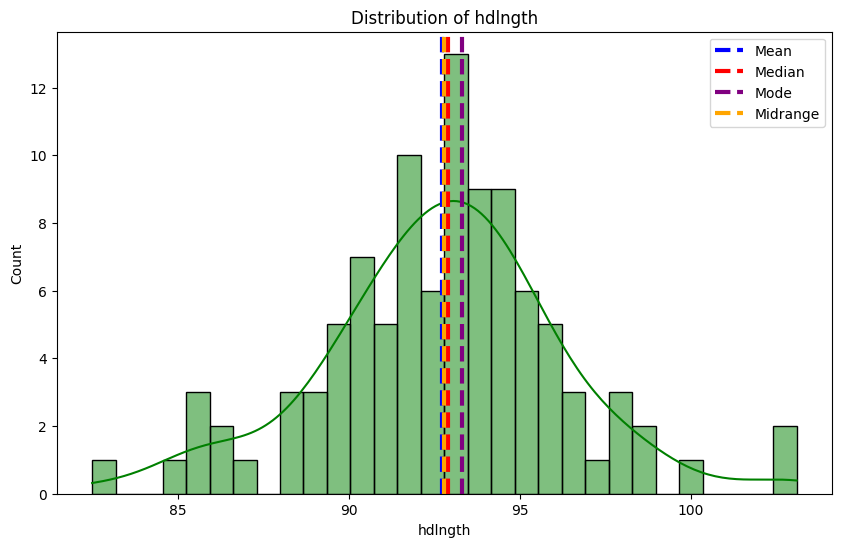

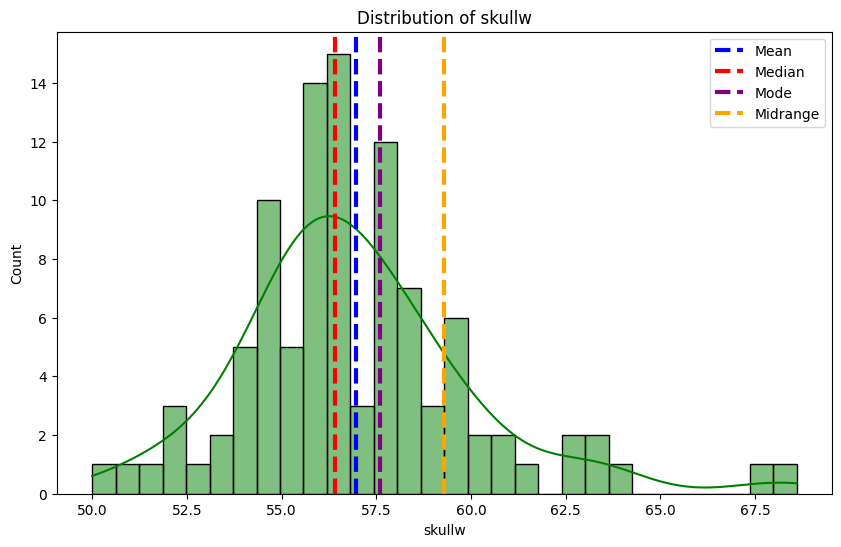

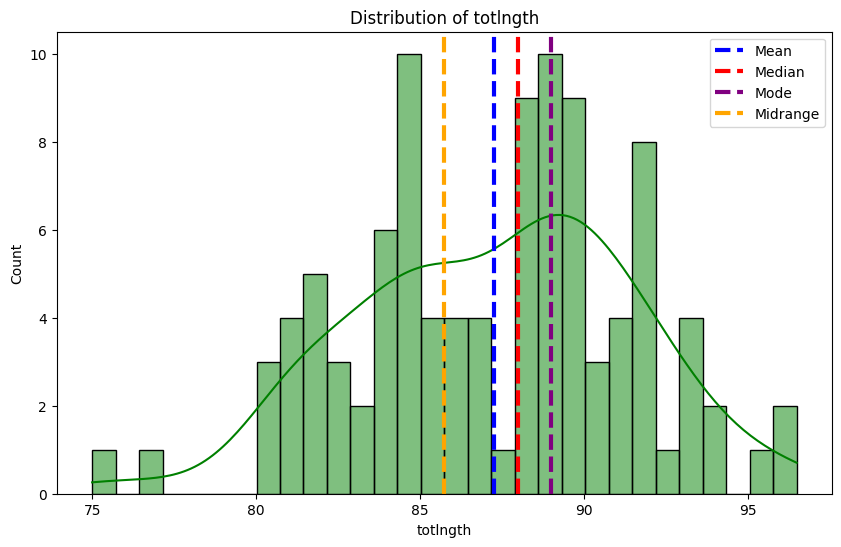

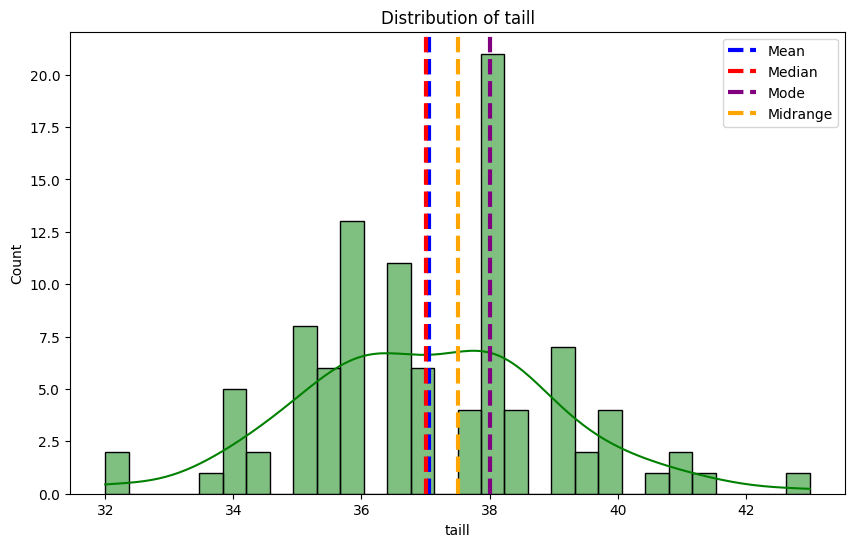

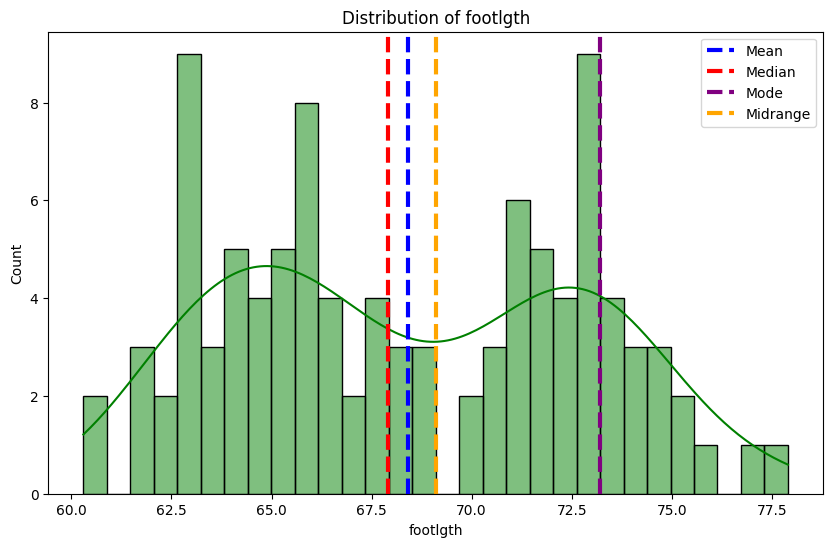

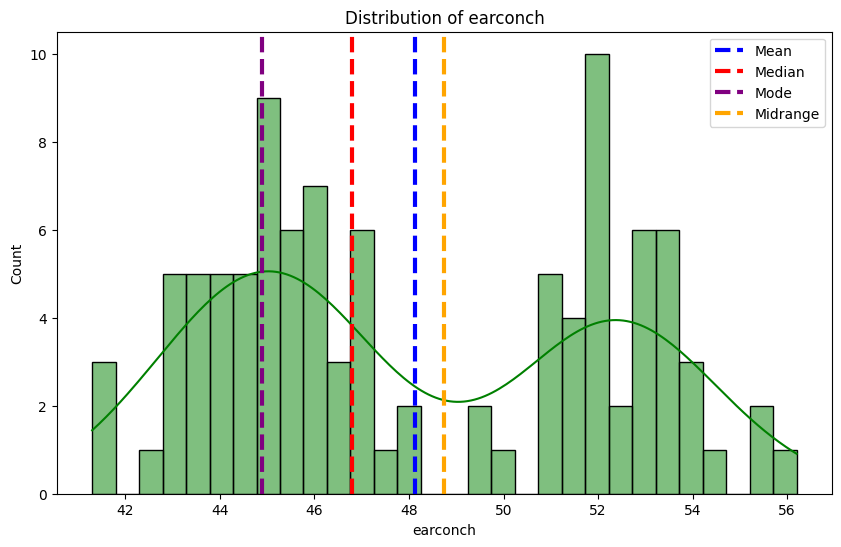

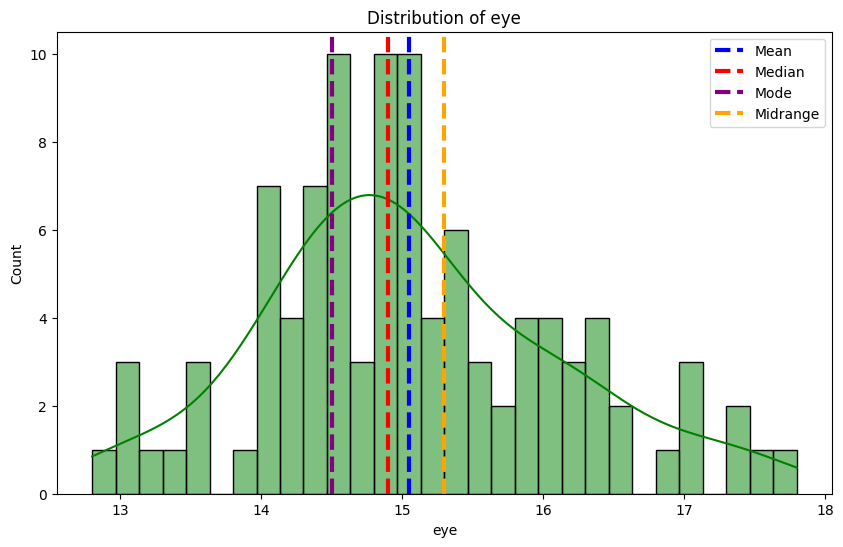

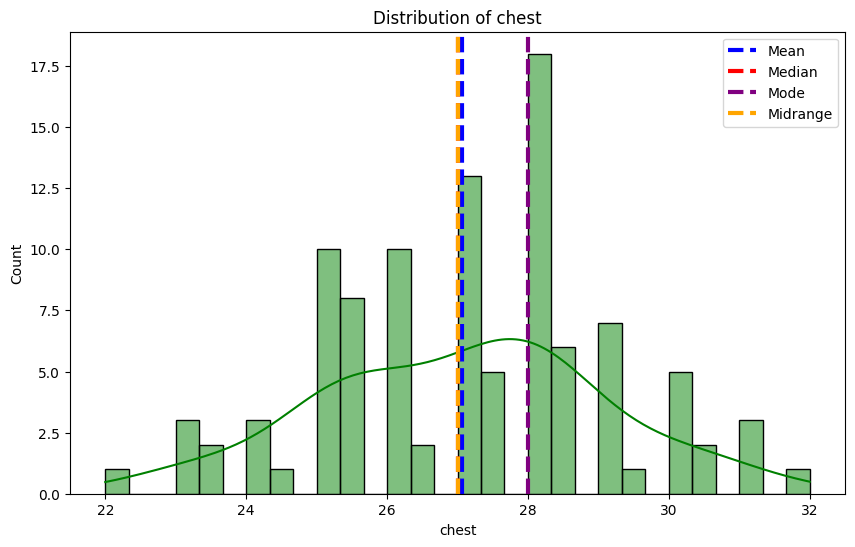

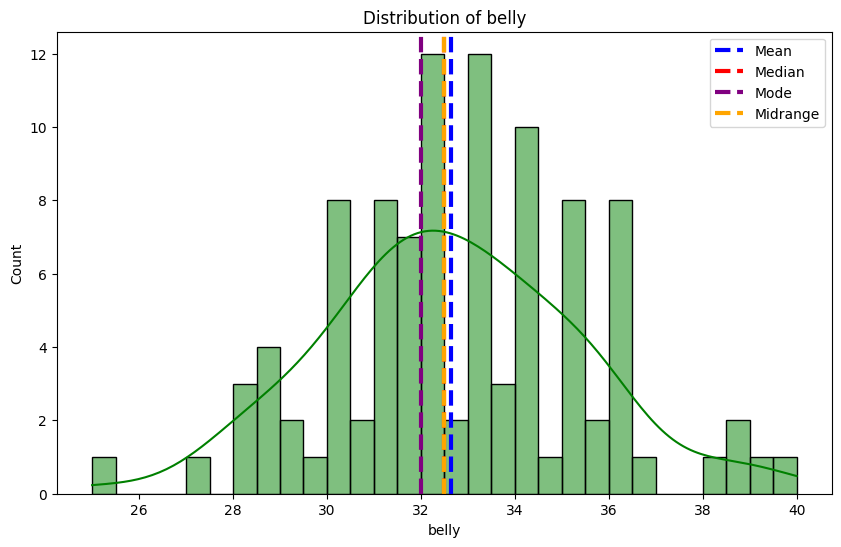

In [217]:
# Measure of centre visualization for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='green', bins=30)
    plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=3, label='Mean')
    plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=3, label='Median')
    plt.axvline(df[col].mode()[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')
    midrange = (df[col].min() + df[col].max()) / 2
    plt.axvline(midrange, color='orange', linestyle='dashed', linewidth=3, label='Midrange')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()
                

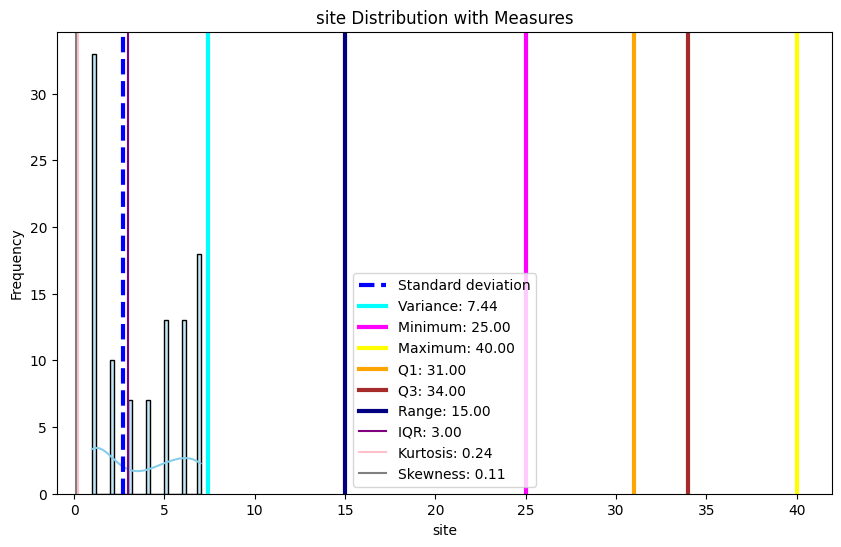

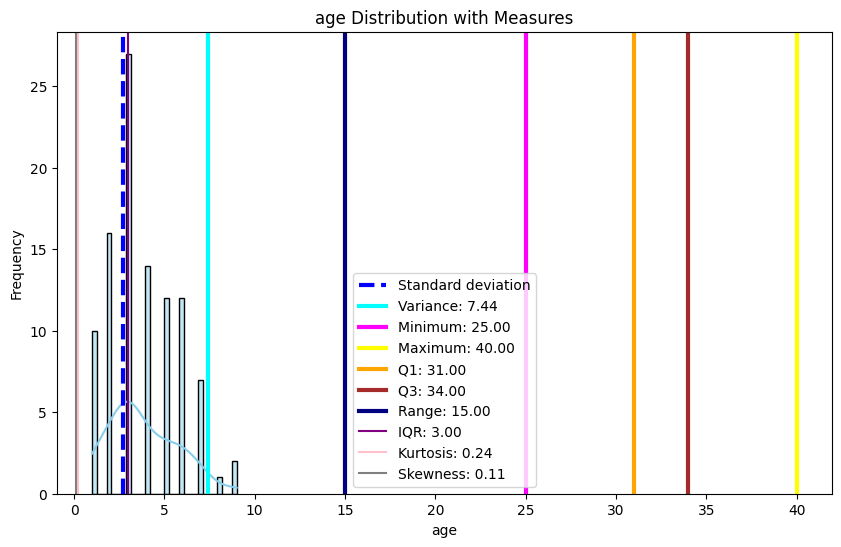

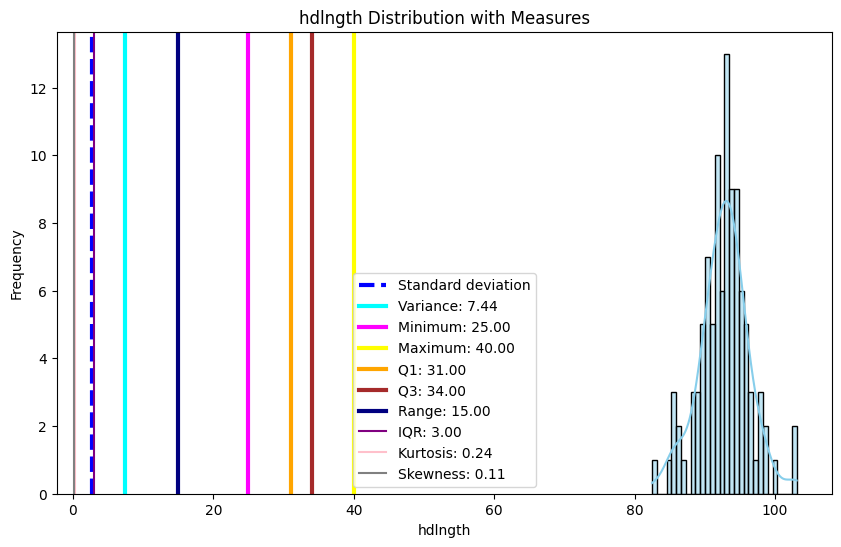

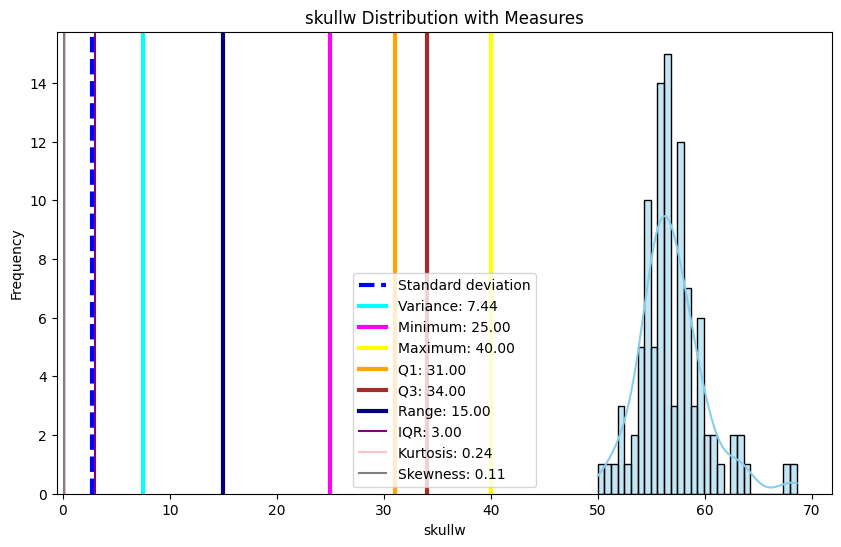

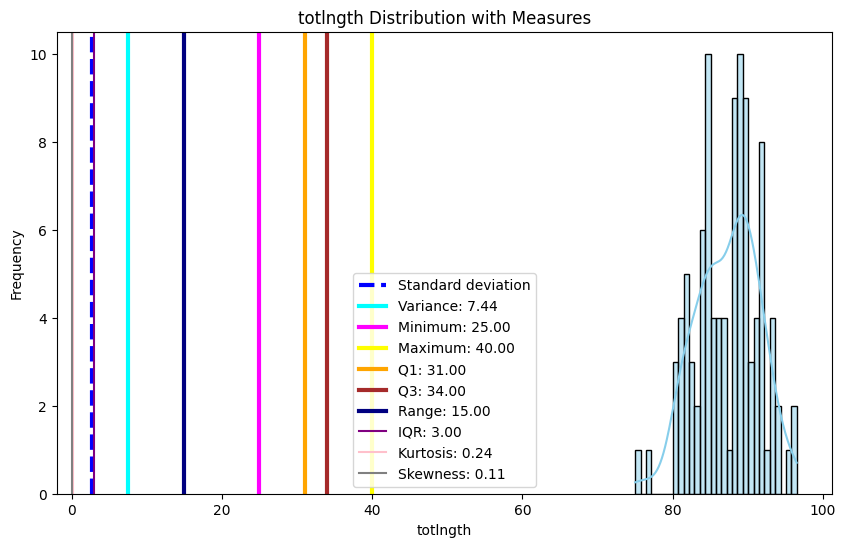

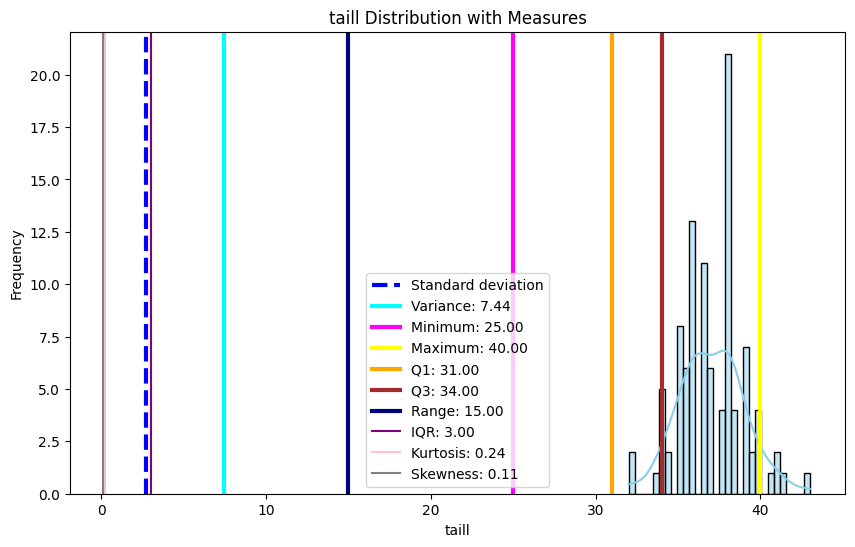

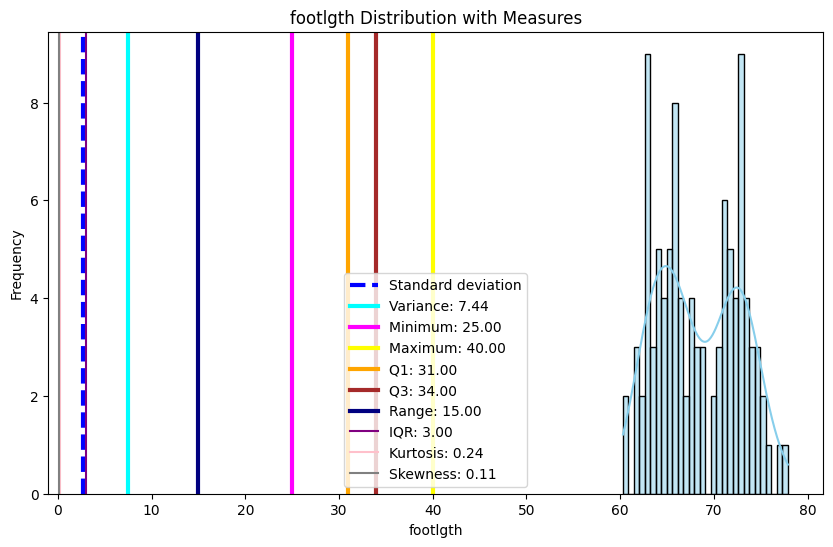

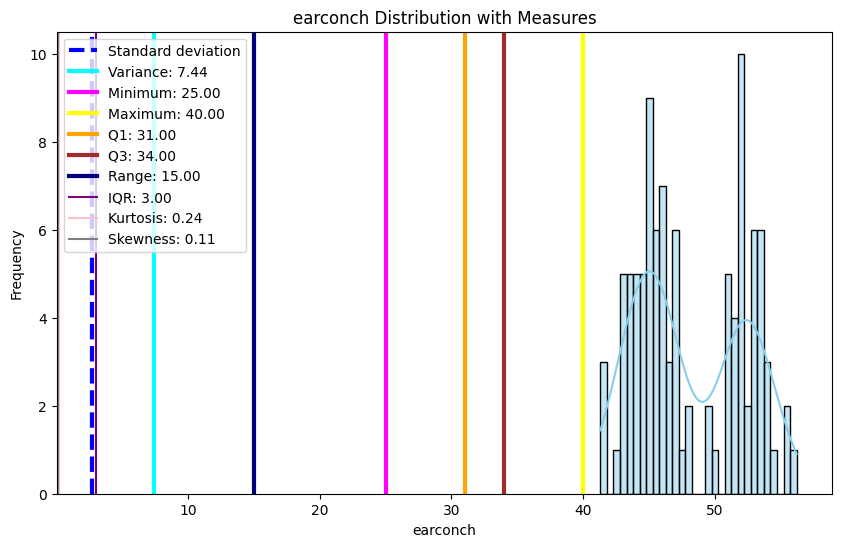

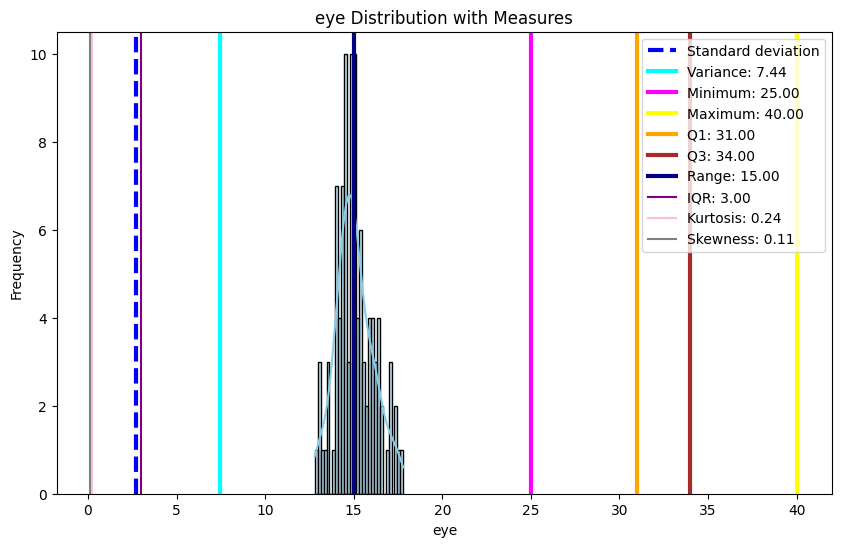

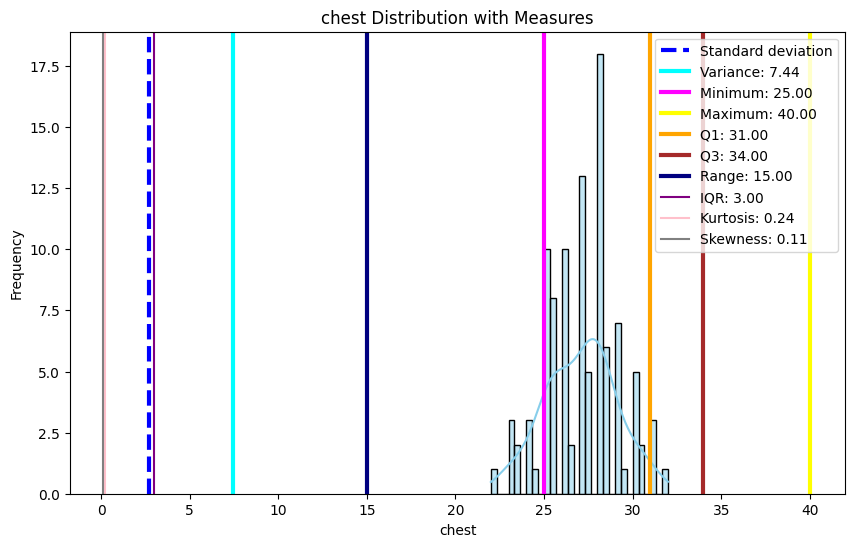

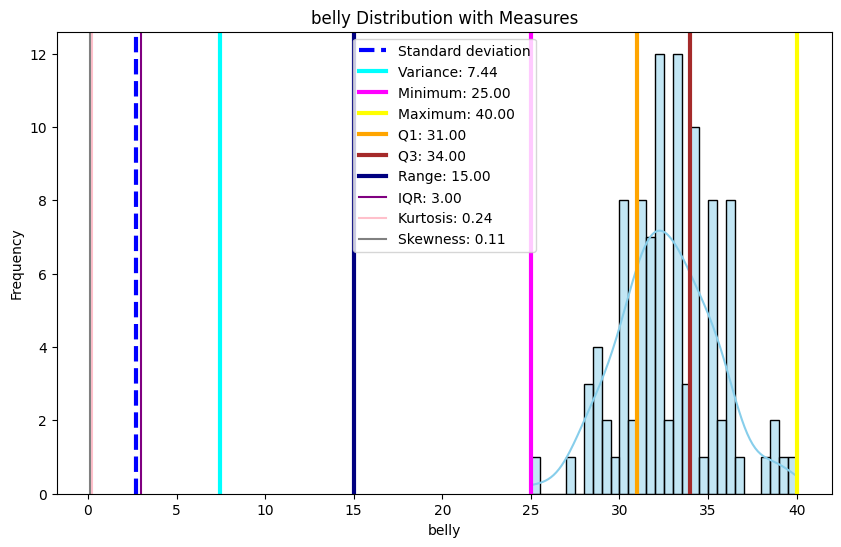

In [218]:
# Measure of spread visualization for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.axvline(std_dev, color='blue', linestyle='dashed', linewidth=3, label='Standard deviation')
    plt.axvline(variance, color='cyan', linestyle='-', linewidth=3, label=f'Variance: {variance:.2f}')
    plt.axvline(min_val, color='magenta', linestyle='-', linewidth=3, label=f'Minimum: {min_val:.2f}')
    plt.axvline(max_val, color='yellow', linestyle='-', linewidth=3, label=f'Maximum: {max_val:.2f}')
    plt.axvline(q1, color='orange', linestyle='-', linewidth=3, label=f'Q1: {q1:.2f}')
    plt.axvline(q3, color='brown', linestyle='-', linewidth=3, label=f'Q3: {q3:.2f}')
    plt.axvline(data_range, color='navy', linestyle='-', linewidth=3, label=f'Range: {data_range:.2f}')
    plt.axvline(iqr, color='purple', linestyle='-', label=f'IQR: {iqr:.2f}')
    plt.axvline(kurtosis, color='pink', linestyle='-', label=f'Kurtosis: {kurtosis:.2f}')
    plt.axvline(skewness, color='grey', linestyle='-', label=f'Skewness: {skewness:.2f}')
    plt.title(f'{col} Distribution with Measures')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    


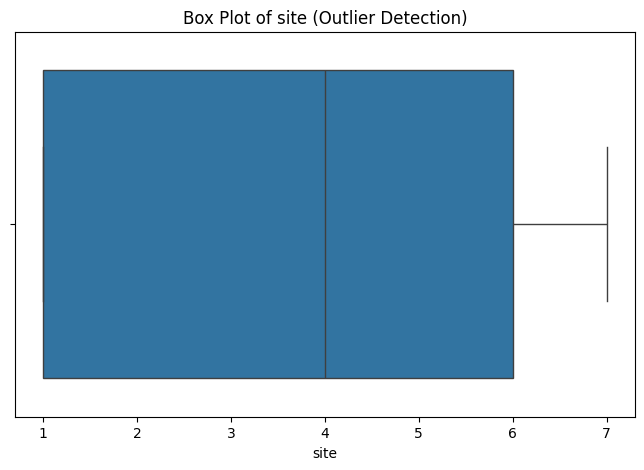

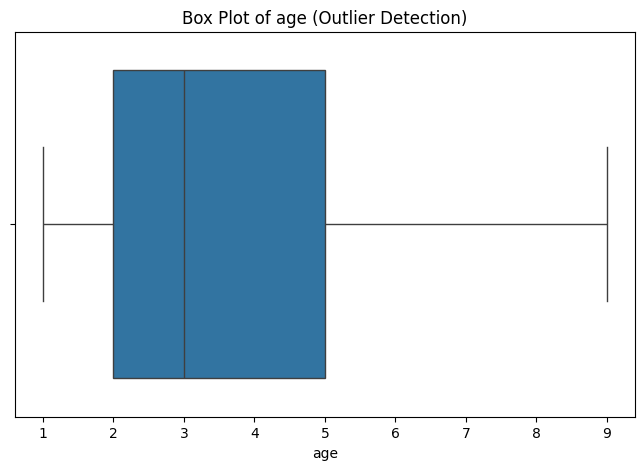

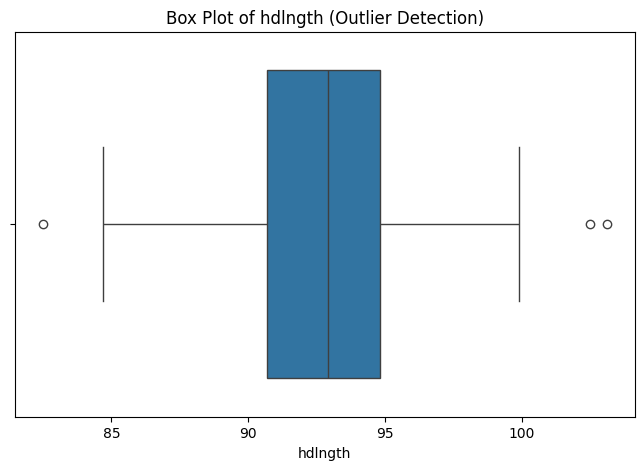

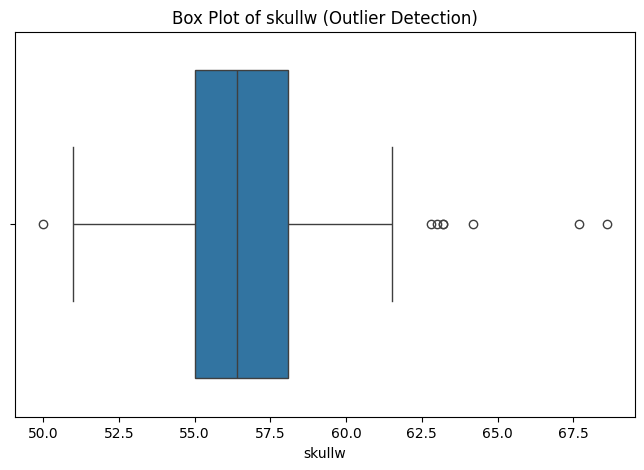

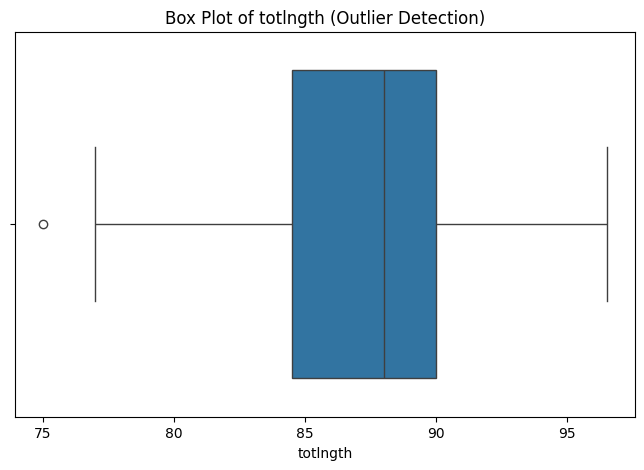

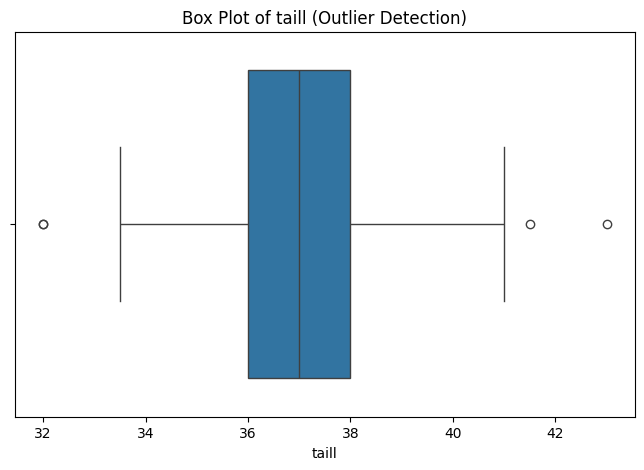

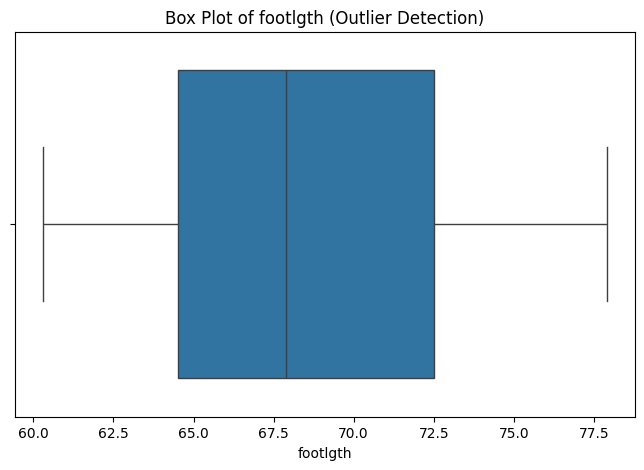

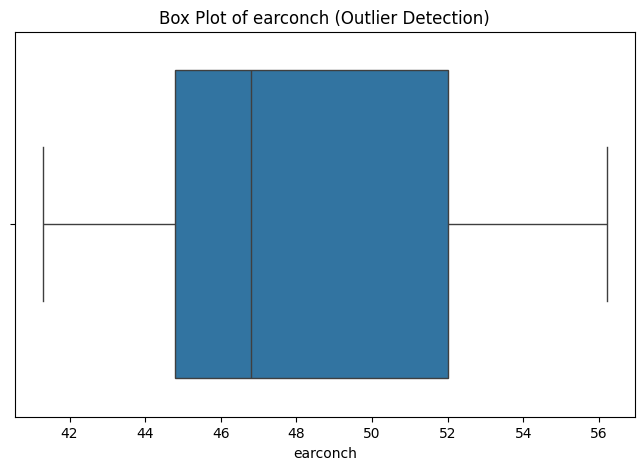

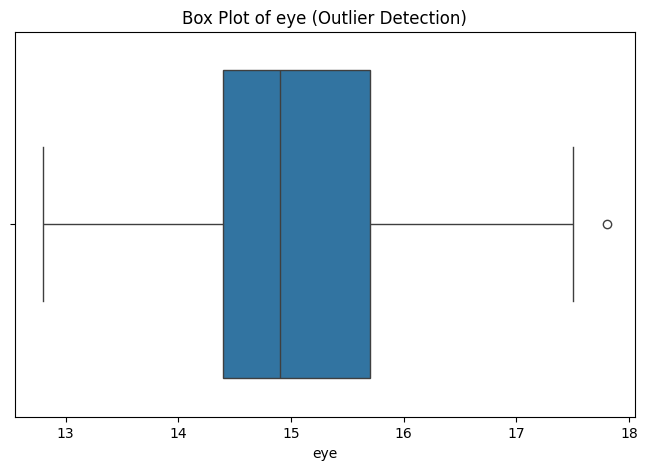

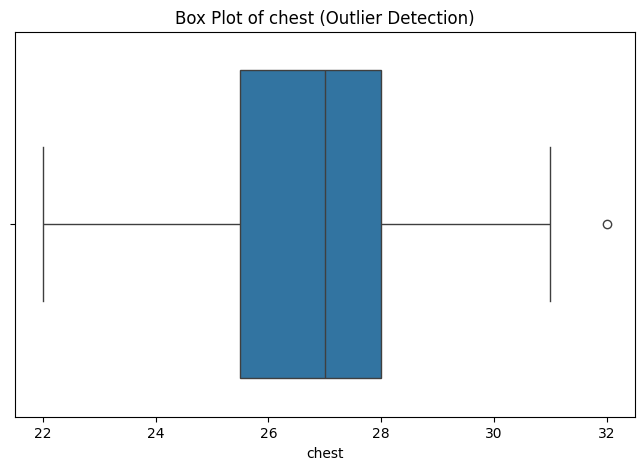

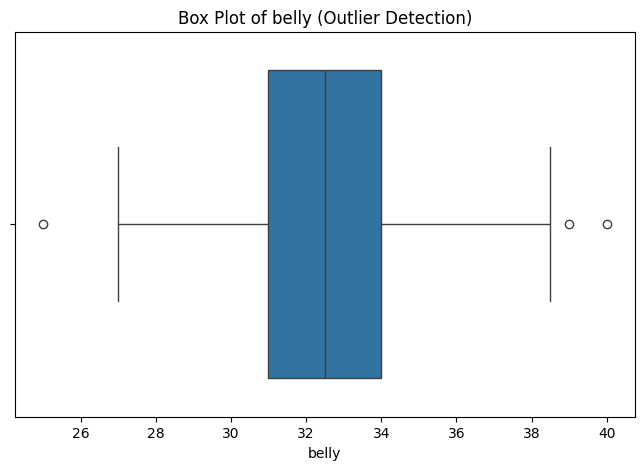

In [219]:
# Outlier detection visualization
for col in numerical_cols:    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (Outlier Detection)')
    plt.show()


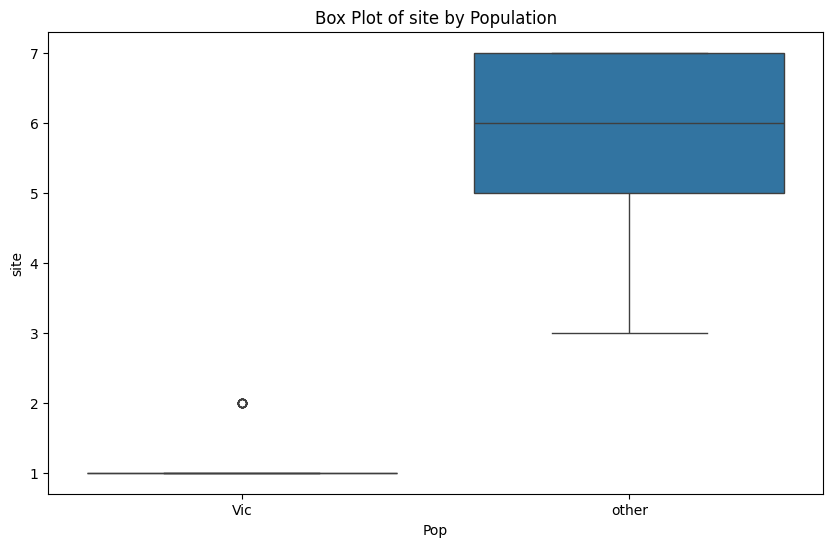

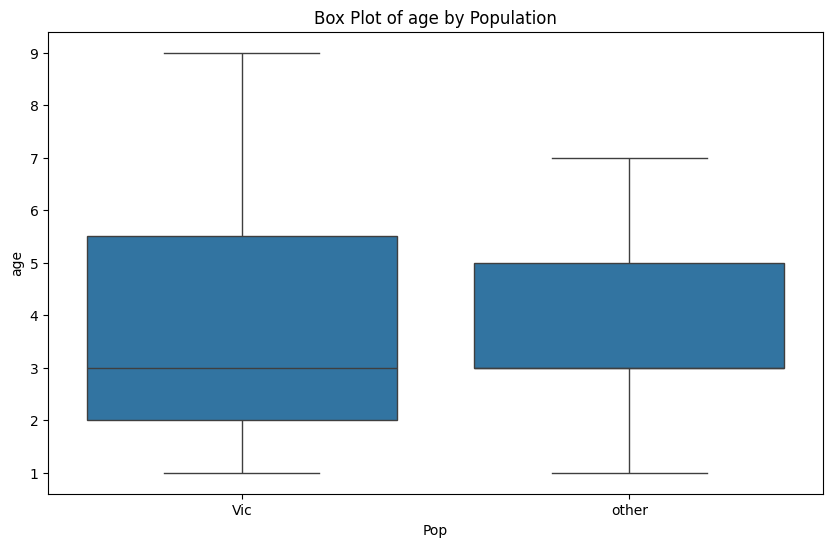

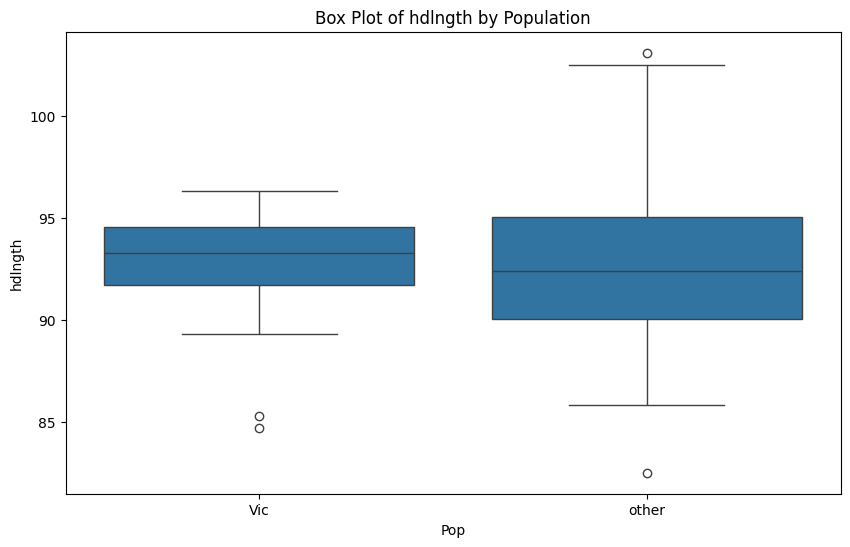

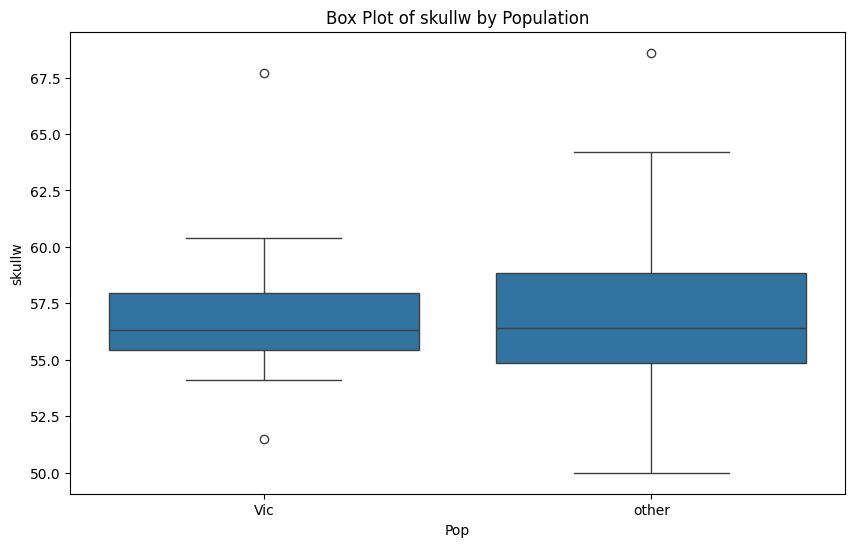

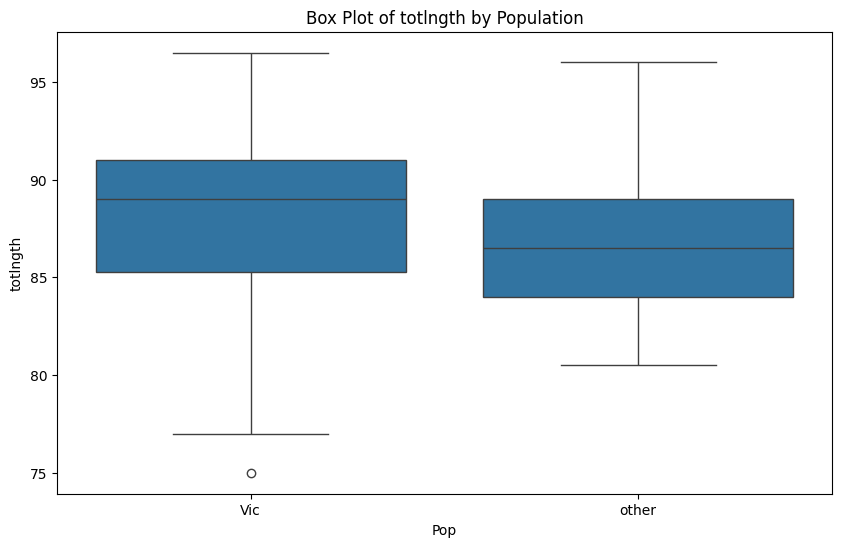

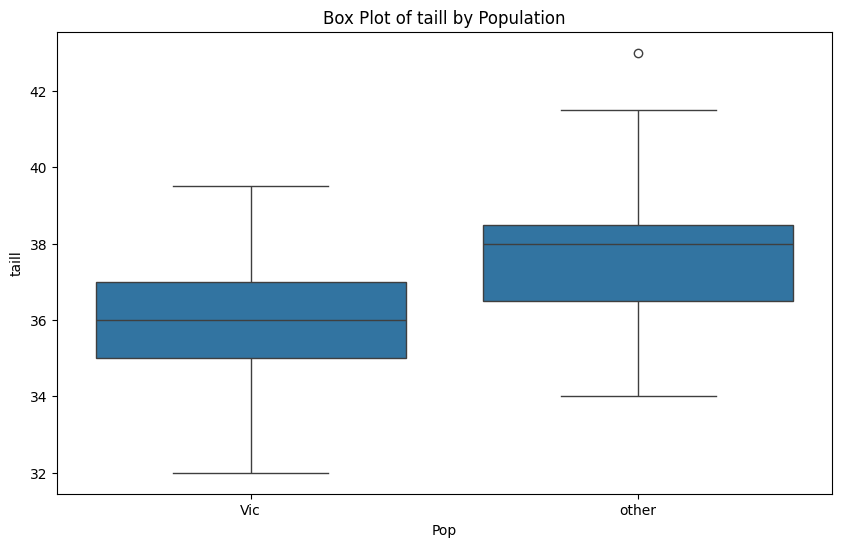

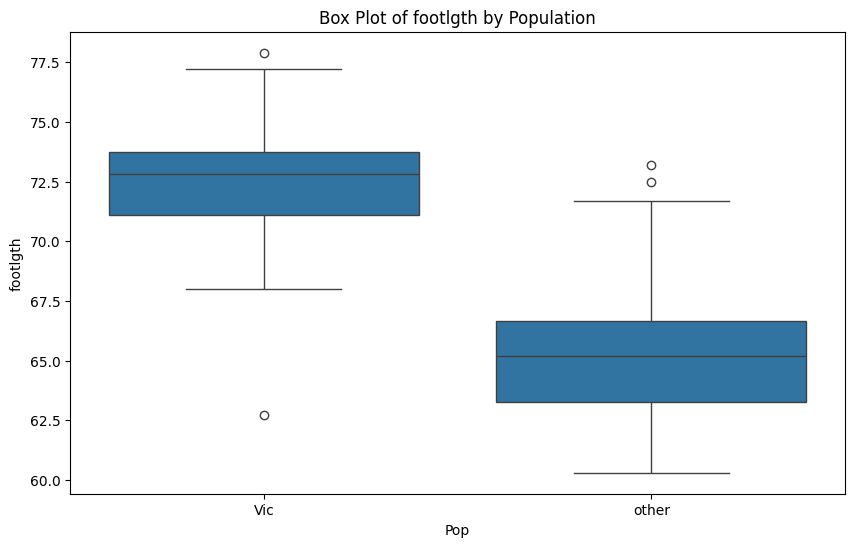

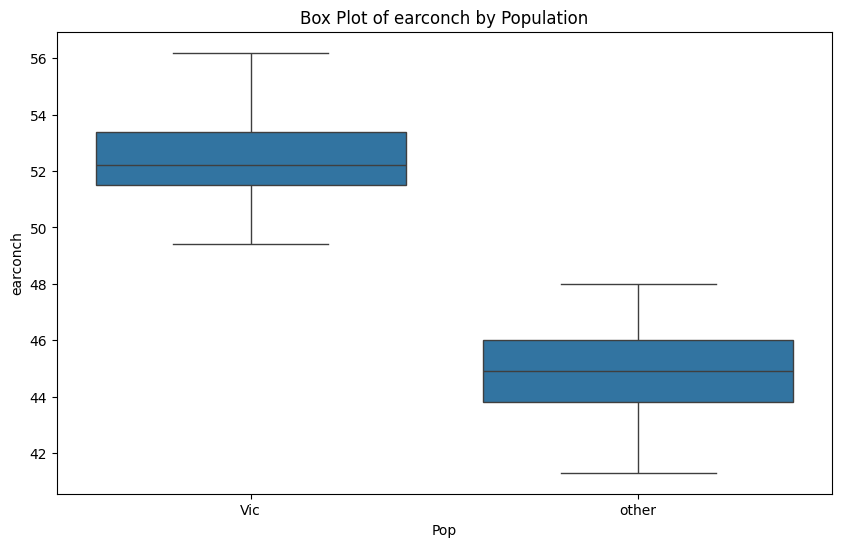

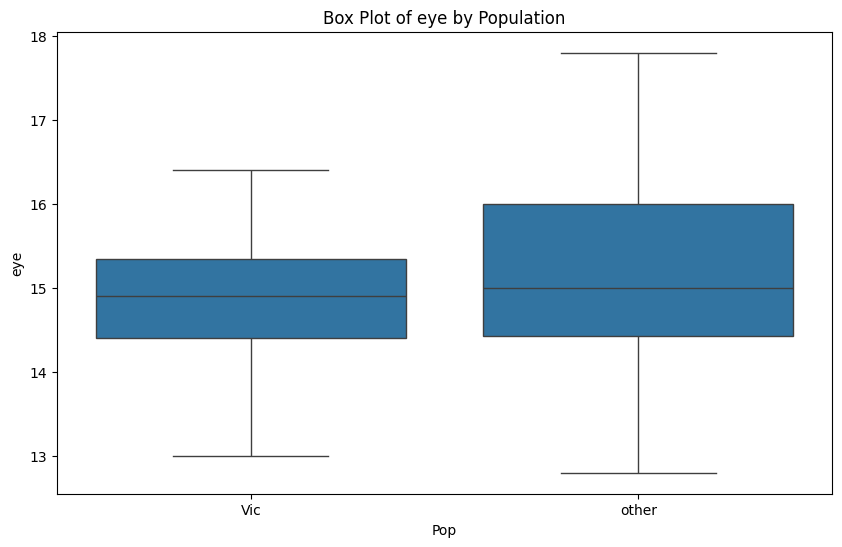

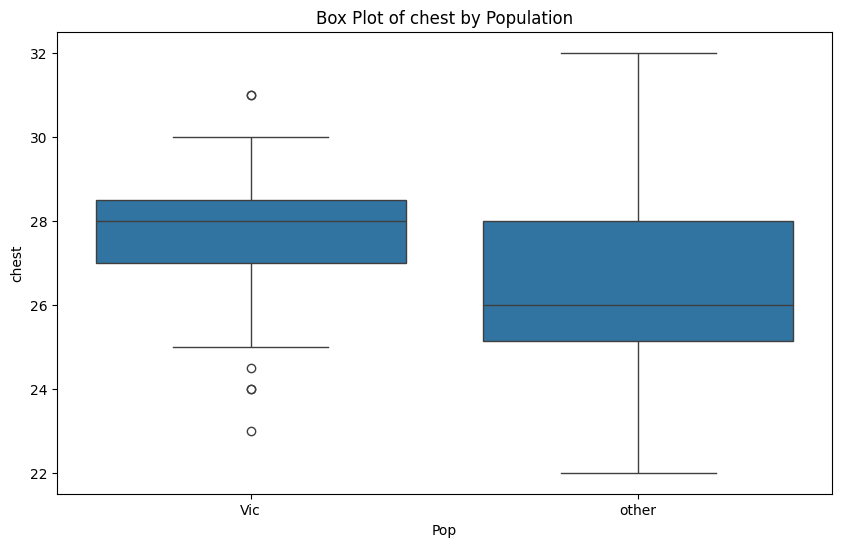

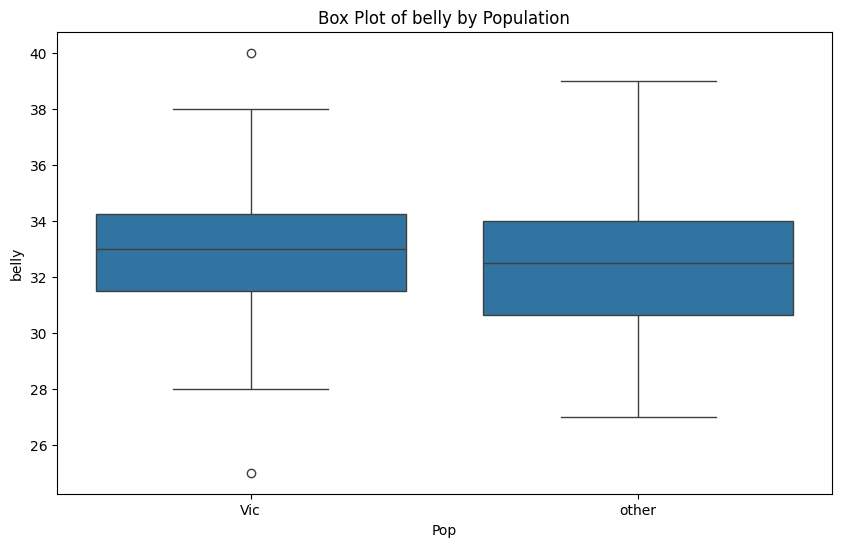

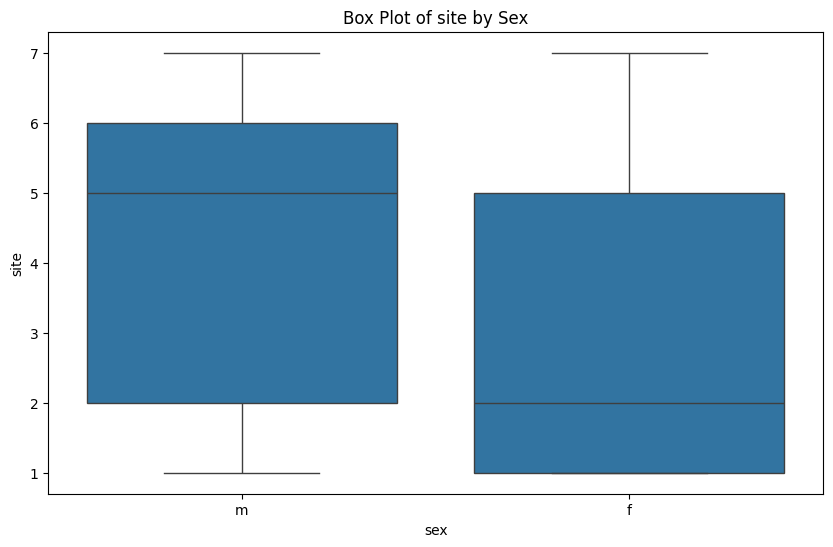

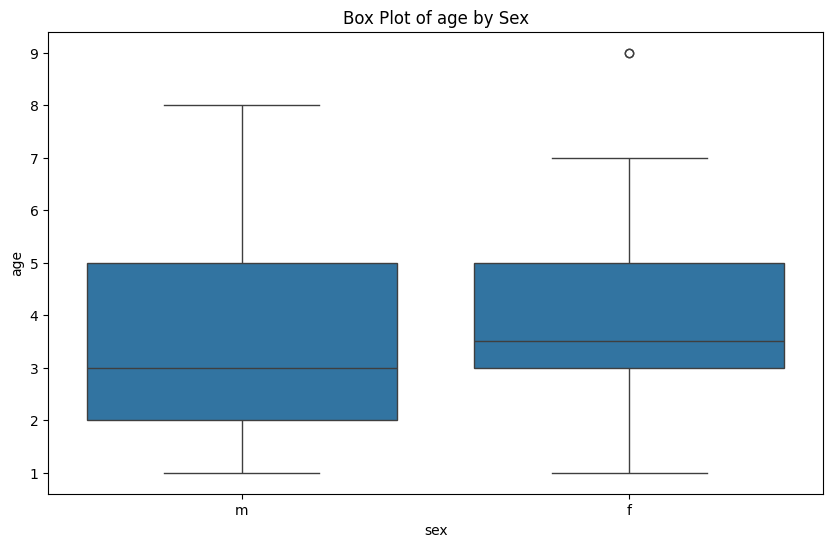

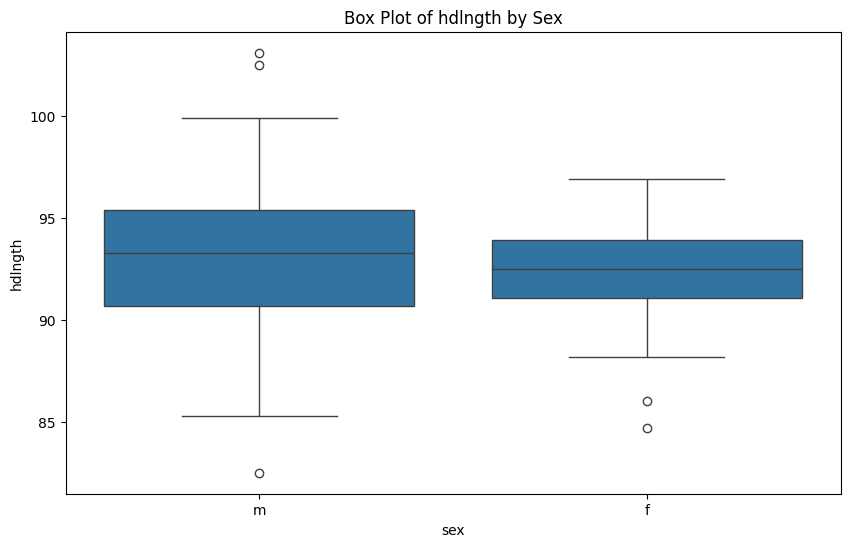

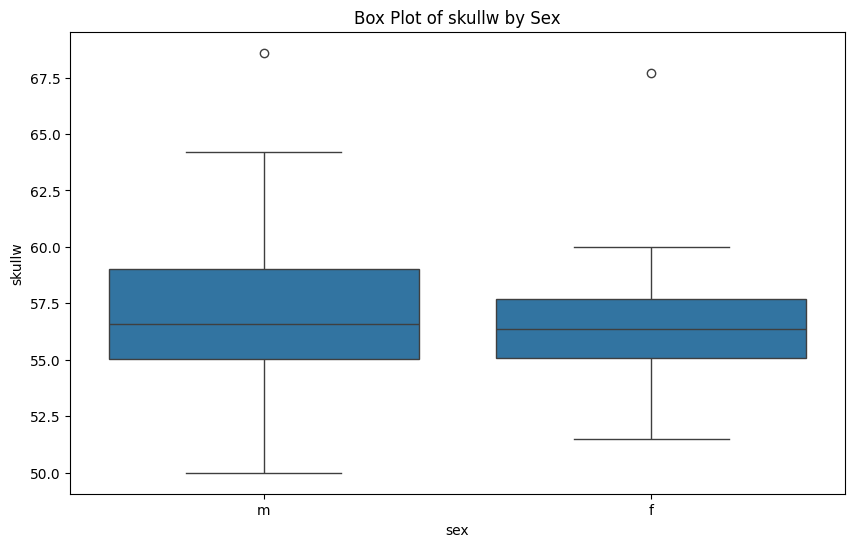

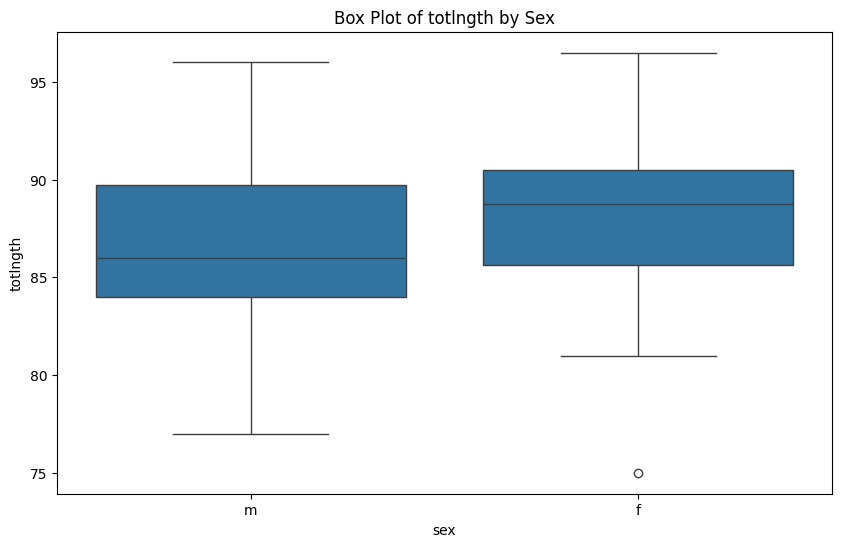

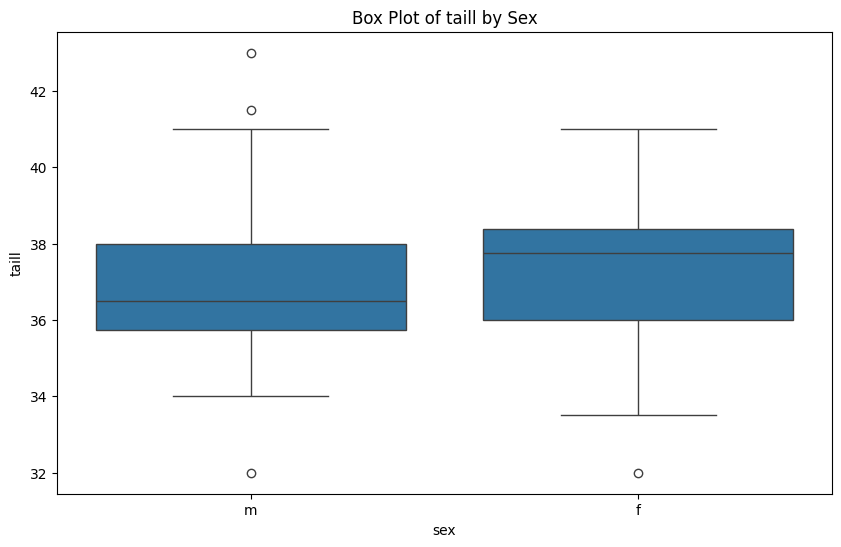

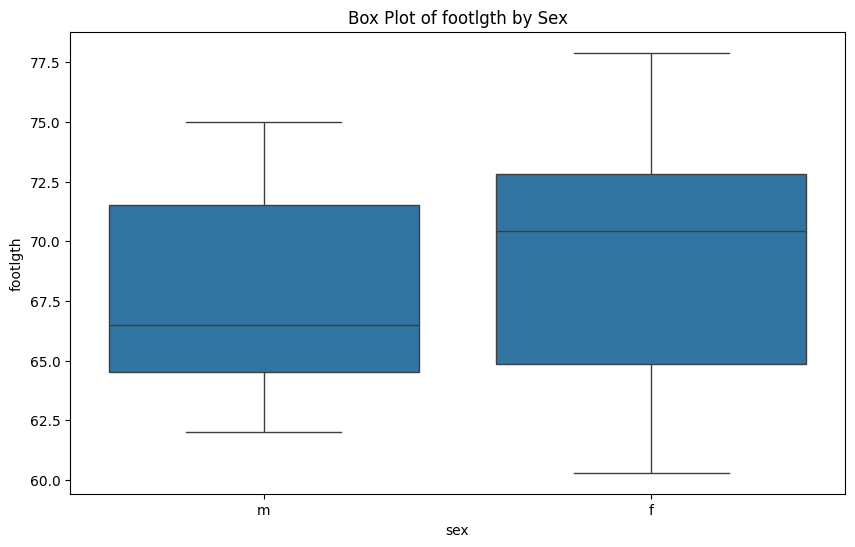

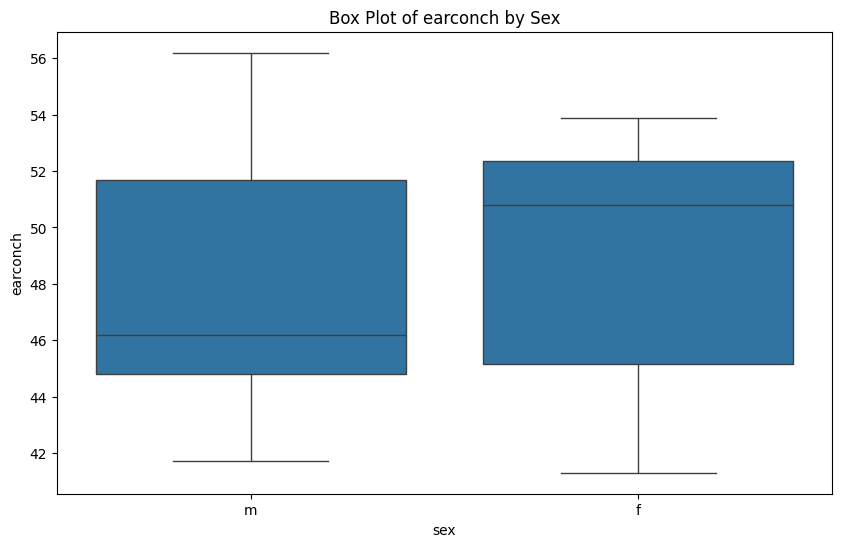

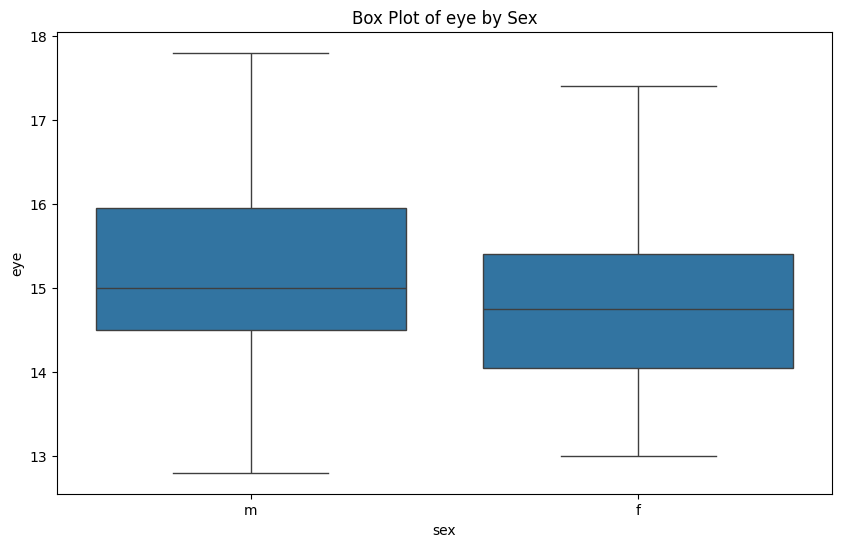

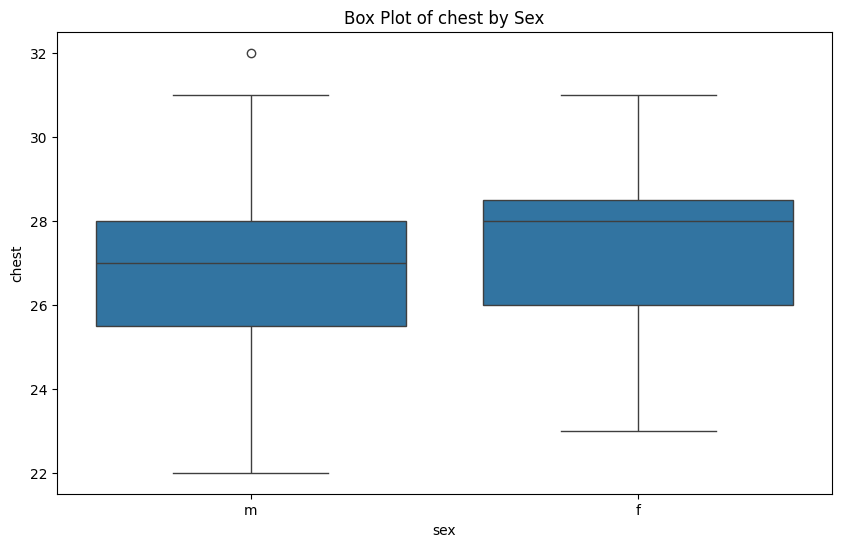

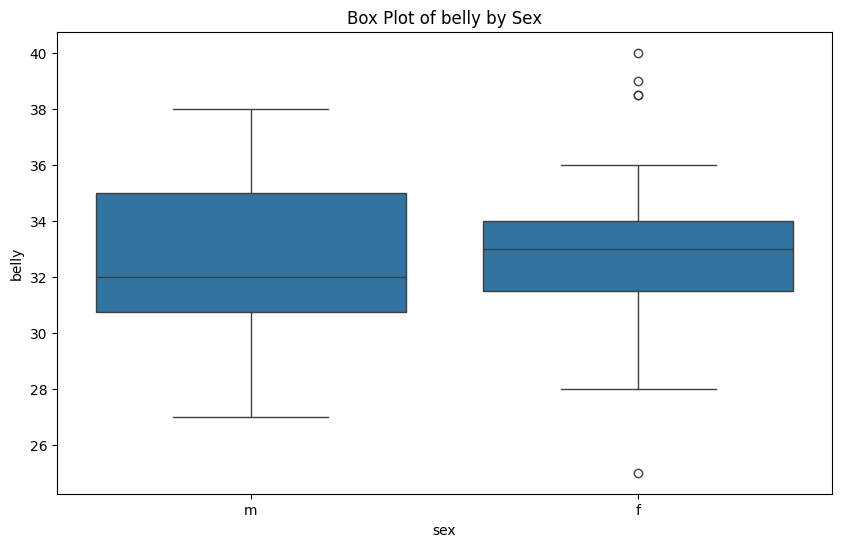

In [220]:
# Differences visualization

# Box plots to visualize differences betwwen Victoria and other populations
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pop', y=col, data=df)
    plt.title(f'Box Plot of {col} by Population')
    plt.show()

# Box plots to visualize differences between sexes
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sex', y=col, data=df)
    plt.title(f'Box Plot of {col} by Sex')
    plt.show()

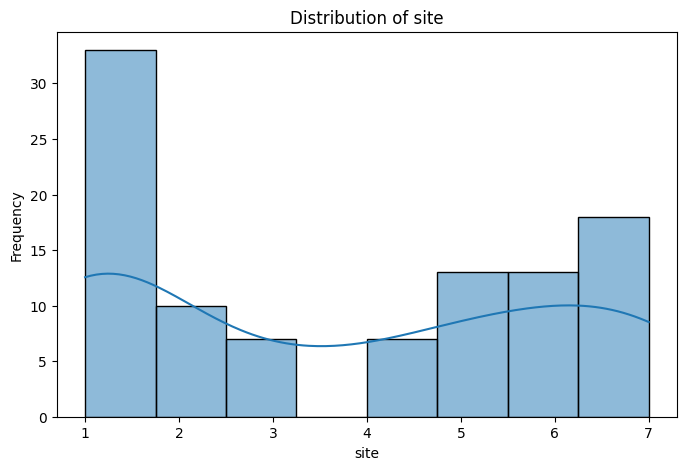

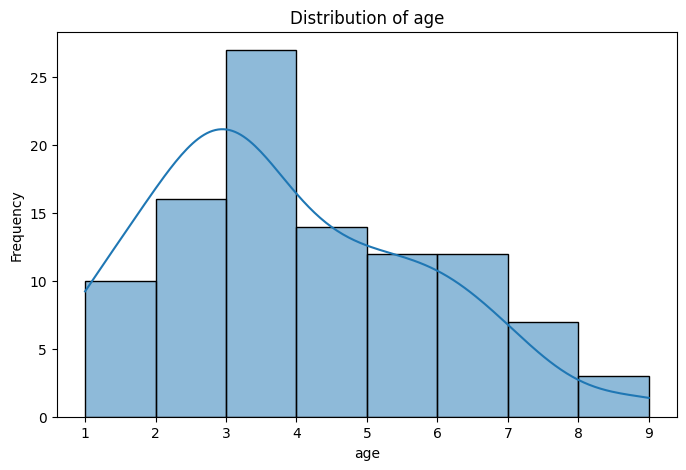

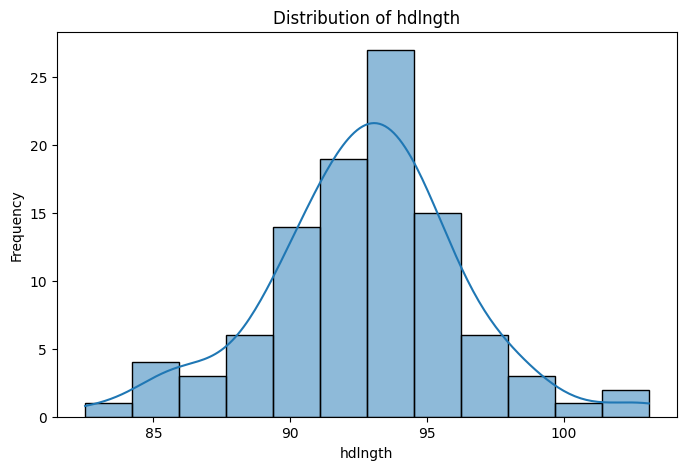

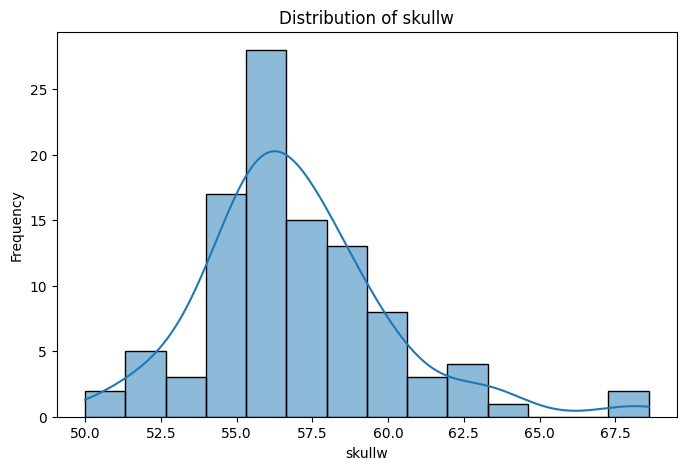

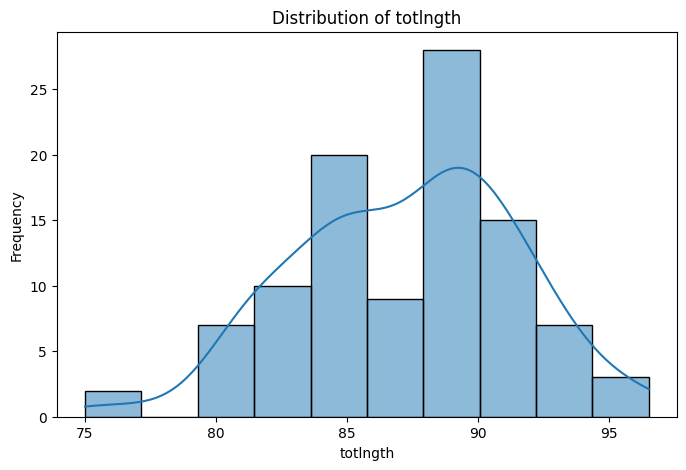

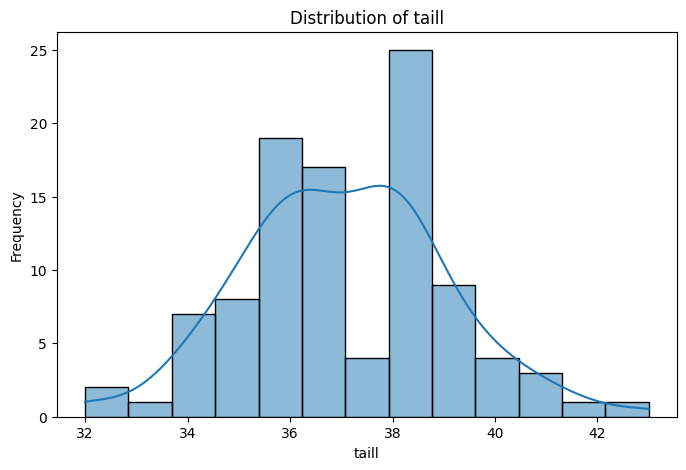

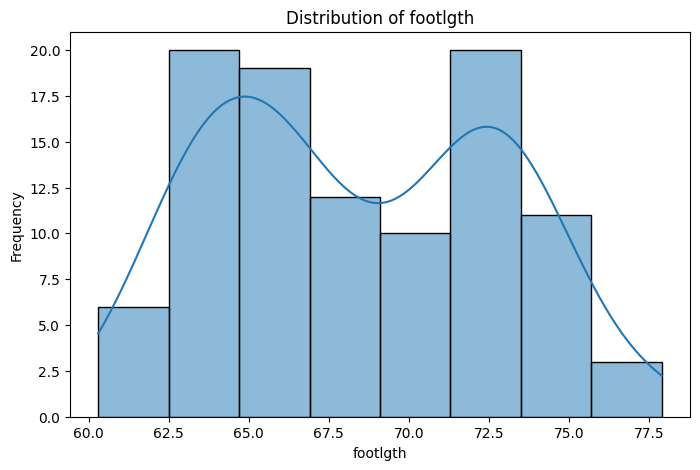

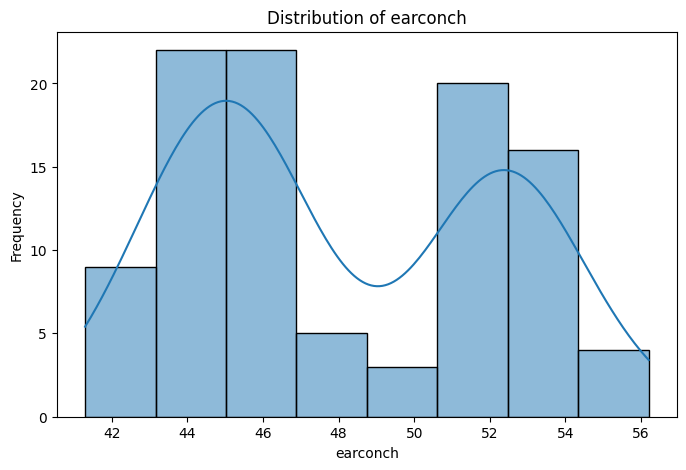

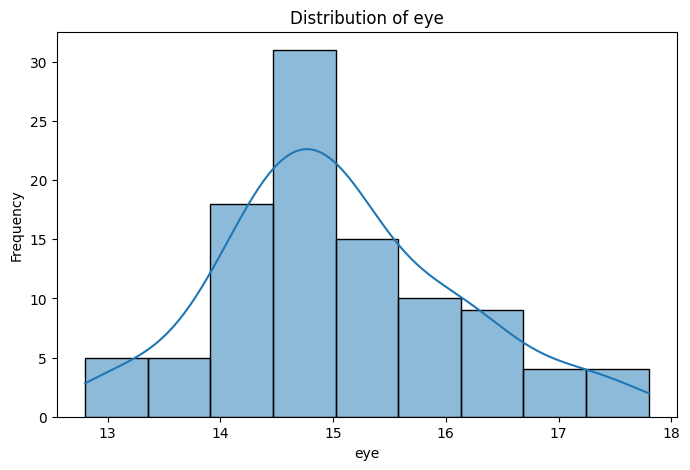

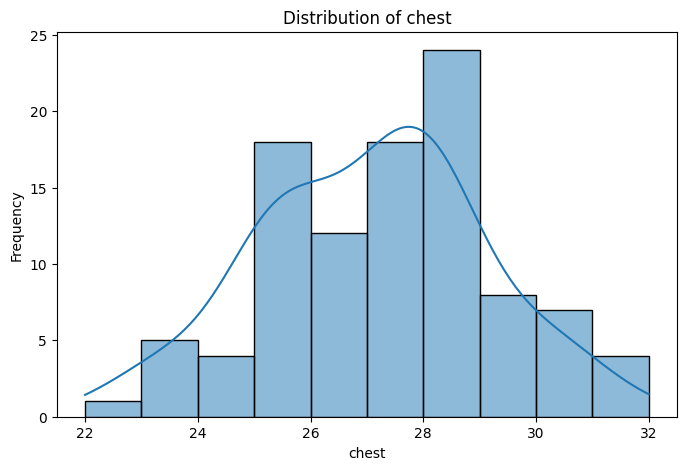

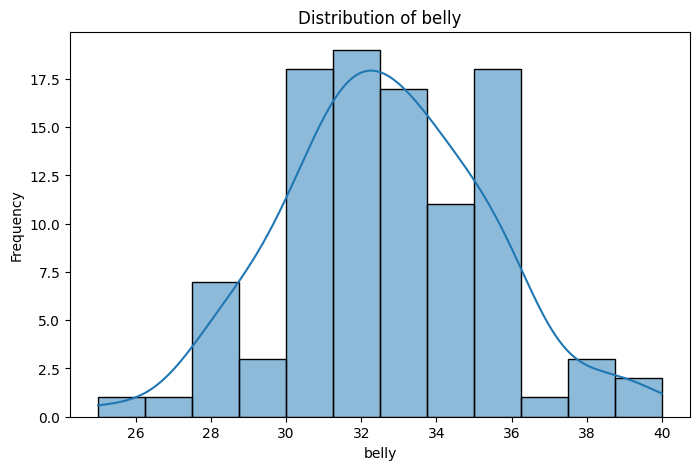

In [221]:
# Distribution Visualizations
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
 

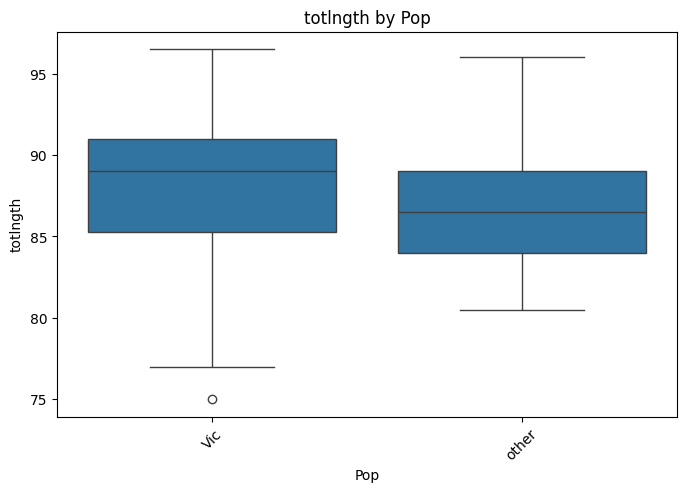

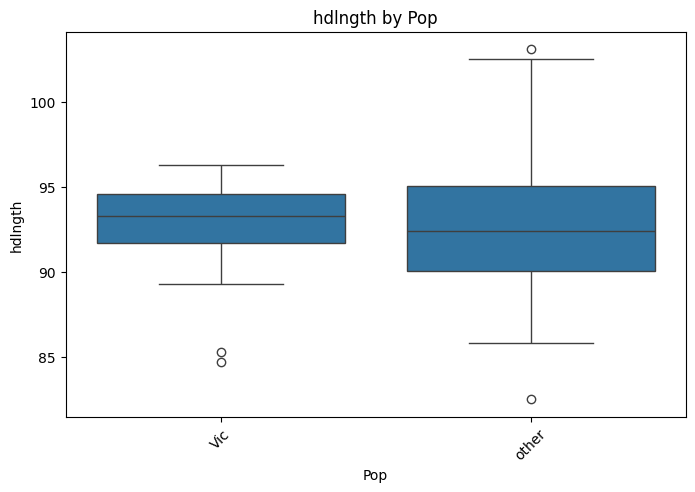

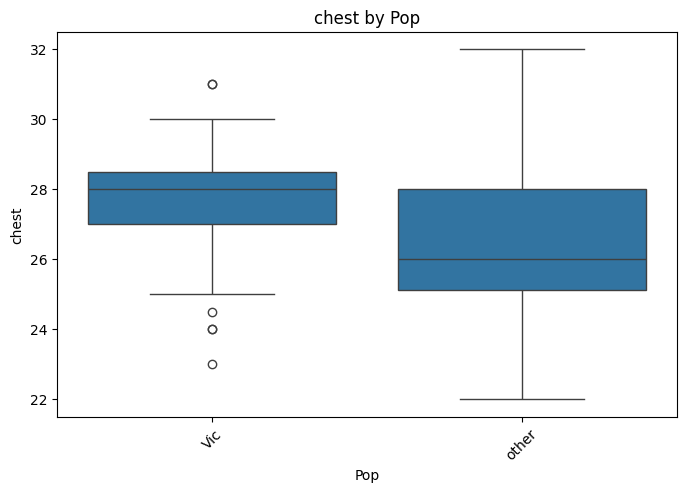

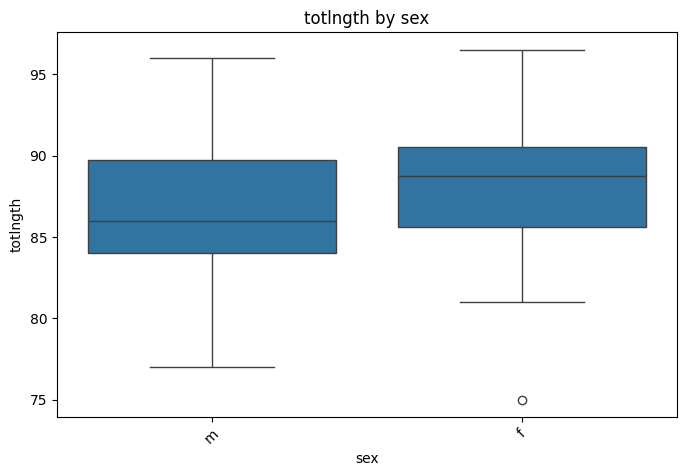

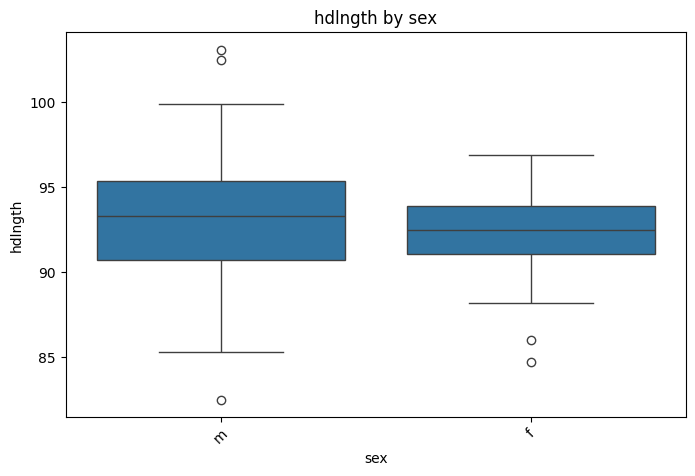

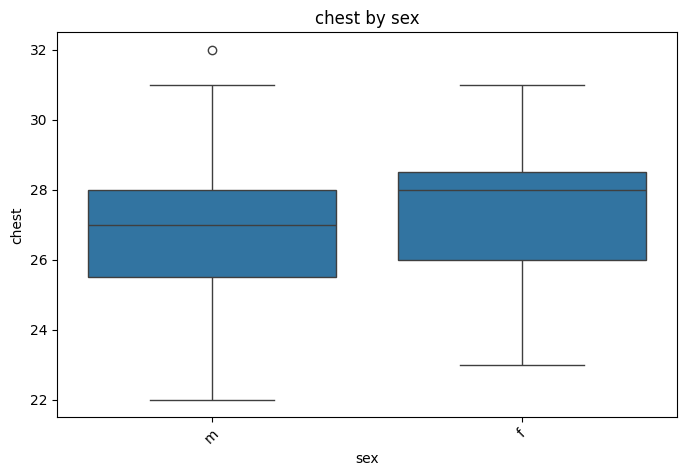

In [222]:
# Visualization: Box Plot for Group based statistical analysis
for cat_col in categorical_cols:
    for num_col in ['totlngth', 'hdlngth', 'chest']:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

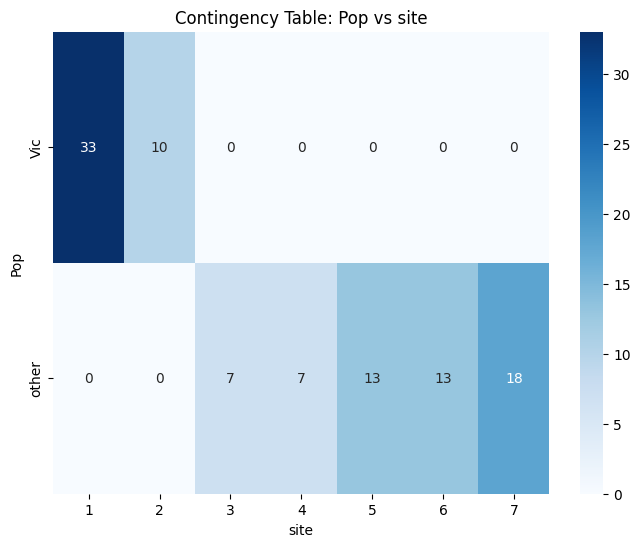

In [223]:
 # Visualization: Heatmap of Contingency Table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title(f'Contingency Table: {cat_col1} vs {cat_col2}')
plt.show()

In [224]:
# Save Cleaned Data
df.to_csv('cleaned_possum.csv', index=False)